In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install -q transformers
!pip install -q feedparser
!pip install -q spacy
!python3 -m spacy download de_core_news_sm
!python3 -m spacy download en_core_web_sm
!python3 -m spacy download fr_core_news_sm

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 3.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.6/14.6 MB 27.7 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('de_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 63.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

# First Step: Dataset Creation

## Why have we used the summary?
- _Summary_ contains complete sentences. So, we think it would be  easier to translate another language.

In [ ]:
import feedparser

def feedparser_from_url(url):
    feed = feedparser.parse(url)
    return [entry.get('summary', '') for entry in feed.get('entries', [])]
#function for feedparser usage

In [ ]:
import spacy
import re

def split_summary_into_sentences(entries, language):
    """
    Splits summaries into sentences for English, German, or French.

    Args:
        entries (list): A list of text summaries.
        language (str): The language of the summaries ('en', 'de', or 'fr').

    Returns:
        list: A list of individual sentences.
    """

    # Load the appropriate SpaCy model
    if language == 'en':
        nlp = spacy.load("en_core_web_sm")
    elif language == 'de':
        nlp = spacy.load("de_core_news_sm")
    elif language == 'fr':
      processed_entries = []
      pattern = r'(?<=[.?!..."])'

      for entry in entries:
        split_summary = re.split(pattern, entry)
        split_summary = [part.strip() for part in split_summary if part.strip()]
        processed_entries.extend(split_summary)
      return processed_entries
    else:
        raise ValueError("Unsupported language. Please choose 'en', 'de', or 'fr'.")

    sentences = []
    for entry in entries:
        doc = nlp(entry)
        sentences.extend([sent.text for sent in doc.sents])
    return sentences

In [ ]:
def process_rss_file(file_path, language):
    with open(file_path, "r") as file:
        text = file.read()
        urls = [a for a in text.split()]

    entries = []
    index = 0
    while len(entries) < 2000:  # Limit to 2000 sentences per language
        if index > (len(urls) - 1):
            break
        url = urls[index]
        entry = feedparser_from_url(url)
        entry_sentences = split_summary_into_sentences(entry, language)
        entries += entry_sentences
        index += 1
    return entries

In [ ]:
english_entries = process_rss_file("/content/drive/MyDrive/ceng534/data/rss_english.txt", "en")
german_entries = process_rss_file("/content/drive/MyDrive/ceng534/data/rss_german.txt", "de")
french_entries = process_rss_file("/content/drive/MyDrive/ceng534/data/rss_french.txt", "fr")

## Dataset Visualization without Filtering

In [ ]:
import pandas as pd

pd.set_option("display.max_colwidth", None)

# Display the DataFrames for each language
print(f"English Entries: {len(pd.DataFrame(english_entries).drop_duplicates(ignore_index=True))}")
display(pd.DataFrame(english_entries).drop_duplicates(ignore_index=True))

print(f"German Entries: {len(pd.DataFrame(german_entries).drop_duplicates(ignore_index=True))}")
display(pd.DataFrame(german_entries).drop_duplicates(ignore_index=True))

print(f"French Entries: {len(pd.DataFrame(french_entries).drop_duplicates(ignore_index=True))}")
display(pd.DataFrame(french_entries).drop_duplicates(ignore_index=True))

English Entries: 1562


,0
0,A Jeju Air passenger jet carrying 181 people from Bangkok sped off the runway and burst into flames.
1,Two crew were rescued in what was the country’s worst air disaster in decades.
2,"A Times investigation shows how extensively Israel penetrated the Lebanese militia, closely tracking the group’s commanders and culminating in the assassination of its leader, Hassan Nasrallah."
3,The leader of Azerbaijan criticized the Russian response to the crash of a passenger jet that Azerbaijani officials said had most likely been hit by Russian air defenses.
4,"Even as battles with its enemies on its borders appear to be winding down, Israel is being challenged by intensifying attacks by the Houthi militia in Yemen, 1,000 miles away."
...,...
1557,"The proposal marks the latest effort by political leaders worldwide to regulate children’s use of platforms, amid concerns that it is harming their mental health."
1558,Scientists debate whether a multibillion-dollar plan to eliminate invasive animals by 2050 is feasible.
1559,The French leader said he is open to suspending a voting-rights bill that sparked the riots once order is restored on the archipelago and talks resume between rival factions.
1560,Unrest in the overseas territory could derail President Emmanuel Macron’s efforts to restore French influence in the Indo-Pacific region.


German Entries: 2003


,0
0,"Im Fall der im Iran inhaftierten italienischen Journalistin Sala ist ein Video aufgetaucht, das sie im Iran aufgezeichnet haben soll."
1,Es könnte in Zusammenhang mit ihrer Festnahme stehen.
2,Von Tina Fuchs.
3,Die kroatische Bevölkerung hat einen Präsidenten gewählt - und sich dabei offenbar für den Amtsinhaber entschieden.
4,Einer Nachwahlbefragung zufolge konnte sich Zoran Milanovic bereits in der ersten Runde durchsetzen.
...,...
1998,"Das Bündnis Sahra Wagenknecht hat in der Wahlkampagne nach außen nur ein Gesicht: die Parteigründerin, die nun auch Kanzlerkandidatin ist."
1999,"Robert Habeck schildert in einem Interview, wie er den Bundestagswahlkampf angeht."
2000,"Und gibt Einblick in einen Moment, der beinahe seine politische Karriere beendete."
2001,"Man habe in Dresden kein Chaos stiften wollen, sagt BSW-Gründerin Sahra Wagenknecht über die Wahl des Ministerpräsidenten in Sachsen."


French Entries: 1466


,0
0,"Les partisans du président élu les plus farouchement anti-immigration reprochent aux milliardaires pro-Trump issus de la Silicon Valley – dont Elon Musk – de promouvoir et de vouloir étendre les visas H1B, qui permettent aux ingénieurs étrangers de venir aux Etats-Unis."
1,"L’appareil a pris feu après s’être posé sur le tarmac de l’aéroport de Muan, dans le sud-ouest du pays."
2,L’accident pourrait avoir été causé par « une collision avec des oiseaux » et « des conditions météorologiques défavorables ».
3,Les deux boîtes noires de l’avion ont été retrouvées.
4,"Dans un pays occupé par des puissances étrangères, épuisé par une décennie de guerre civile et dans une région où les révolutions ont déstabilisé les institutions, les nouvelles autorités de Damas font face à un défi de taille pour tenter de restaurer la souveraineté syrienne."
...,...
1461,"L'ONU a réaffirmé la nécessité de protéger les civils en Ukraine alors que les attaques russes se poursuivent dans tout le pays, avec au moins sept morts à Lviv mercredi, selon l'Organisation mondiale de la Santé (OMS)."
1462,"L'Agence des Nations Unies pour les réfugiés (HCR) s'est dite bouleversée par le tragique naufrage survenu mardi dans la Manche, où de nombreuses personnes ont perdu la vie alors qu’elles tentaient de rejoindre le Royaume-Uni depuis la France."
1463,"Il y a des taux élevés et « alarmants » de rapports sexuels non protégés en Europe chez les adolescents et une baisse significative de l’utilisation du préservatif depuis dix ans, a alerté jeudi l’Agence sanitaire mondiale de l’ONU (OMS), relevant que cette situation expose les jeunes à « un risque important d’infections sexuellement transmissibles (IST) et de grossesses non désirées »."
1464,"Trente mois après l’invasion à grande échelle de l’Ukraine par la Russie, les souffrances humaines continuent de s’aggraver sur fond de rapports alarmants d’attaques contre des civils et des infrastructures civiles, y compris des installations nucléaires, a déclaré mercredi un haut responsable des affaires politiques de l’ONU au Conseil de sécurité."


## Filter the Dataset with respect to NER Tagged Entity Count
- The entries that has no NER tagged entity are removed from dataset.

In [ ]:
# Function to filter entries with at least 1 NER tag
def filter_by_ner(dataframe, nlp_model):
    filtered_texts = []
    for text in dataframe["text"]:
        doc = nlp_model(text)
        if len(doc.ents) >= 1:  # Check if there are at least 1 NER tags
            filtered_texts.append(text)
        if len(filtered_texts) >= 900:  # You can adjust this limit
            break
    return pd.DataFrame(filtered_texts, columns=["text"])

In [ ]:
import spacy
import pandas as pd

def filter_entries_by_ner(entries, language):
    """
    Filters text entries for English, German, or French based on NER tagged entity size.

    Args:
        entries (list): A list of text entries.
        language (str): The language of the entries ('en', 'de', or 'fr').

    Returns:
        pandas.DataFrame: A DataFrame containing filtered entries with at least one NER tag.
    """

    # Load the appropriate SpaCy model
    if language == 'en':
        nlp = spacy.load("en_core_web_sm")
    elif language == 'de':
        nlp = spacy.load("de_core_news_sm")
    elif language == 'fr':
        nlp = spacy.load("fr_core_news_sm")
    else:
        raise ValueError("Unsupported language. Please choose 'en', 'de', or 'fr'.")

    # Create a DataFrame and drop duplicates
    df = pd.DataFrame(entries, columns=["text"]).drop_duplicates(ignore_index=True)

    # Apply the filter
    filtered_df = filter_by_ner(df, nlp)

    return filtered_df

In [ ]:
# Example usage:
filtered_english_entries = filter_entries_by_ner(english_entries, "en")
filtered_german_entries = filter_entries_by_ner(german_entries, "de")
filtered_french_entries = filter_entries_by_ner(french_entries, "fr")

/usr/local/lib/python3.10/dist-packages/spacy/util.py:1740: UserWarning: [W111] Jupyter notebook detected: if using `prefer_gpu()` or `require_gpu()`, include it in the same cell right before `spacy.load()` to ensure that the model is loaded on the correct device. More information: http://spacy.io/usage/v3#jupyter-notebook-gpu
  warnings.warn(Warnings.W111)


In [ ]:
print("Initial filtered English entries.")
display(filtered_english_entries)
print("Initial filtered German entries.")
display(filtered_german_entries)
print("Initial filtered French entries.")
display(filtered_french_entries)

Initial filtered English entries.


,text
0,A Jeju Air passenger jet carrying 181 people from Bangkok sped off the runway and burst into flames.
1,Two crew were rescued in what was the country’s worst air disaster in decades.
2,"A Times investigation shows how extensively Israel penetrated the Lebanese militia, closely tracking the group’s commanders and culminating in the assassination of its leader, Hassan Nasrallah."
3,The leader of Azerbaijan criticized the Russian response to the crash of a passenger jet that Azerbaijani officials said had most likely been hit by Russian air defenses.
4,"Even as battles with its enemies on its borders appear to be winding down, Israel is being challenged by intensifying attacks by the Houthi militia in Yemen, 1,000 miles away."
...,...
895,Astronauts stranded on the International Space Station over Christmas have sent a festive message back to Earth.
896,The fastest object ever built by humans will fly within a whisker of the sun today.
897,"The preserved remains of a juvenile mammoth have been discovered in thawing permafrost after more than 50,000 years."
898,"Actress Olivia Hussey, best known for playing Juliet in Franco Zeffirelli's 1968 production of Romeo and Juliet, has died aged 73."


Initial filtered German entries.


,text
0,"Im Fall der im Iran inhaftierten italienischen Journalistin Sala ist ein Video aufgetaucht, das sie im Iran aufgezeichnet haben soll."
1,Von Tina Fuchs.
2,Die kroatische Bevölkerung hat einen Präsidenten gewählt - und sich dabei offenbar für den Amtsinhaber entschieden.
3,Einer Nachwahlbefragung zufolge konnte sich Zoran Milanovic bereits in der ersten Runde durchsetzen.
4,"Innerhalb kürzester Zeit haben sich Temu, Shein & Co. als feste Größen im Online-Shopping etabliert."
...,...
895,Auch aus aus der Union kommt regelmäßig Kritik.
896,"Die SPD wäre im Falle einer erneuten Regierungsbeteiligung zu Abstrichen bereit, sagte Fraktionschef Mützenich."
897,Laut Correctiv-Recherche haben sich Politiker der AfD offenbar in der Schweiz mit Neonazis getroffen.
898,Ein Abgeordneter soll für Jobs im Bundestag geworben haben.


Initial filtered French entries.


,text
0,"Les partisans du président élu les plus farouchement anti-immigration reprochent aux milliardaires pro-Trump issus de la Silicon Valley – dont Elon Musk – de promouvoir et de vouloir étendre les visas H1B, qui permettent aux ingénieurs étrangers de venir aux Etats-Unis."
1,"L’appareil a pris feu après s’être posé sur le tarmac de l’aéroport de Muan, dans le sud-ouest du pays."
2,L’accident pourrait avoir été causé par « une collision avec des oiseaux » et « des conditions météorologiques défavorables ».
3,Les deux boîtes noires de l’avion ont été retrouvées.
4,"Dans un pays occupé par des puissances étrangères, épuisé par une décennie de guerre civile et dans une région où les révolutions ont déstabilisé les institutions, les nouvelles autorités de Damas font face à un défi de taille pour tenter de restaurer la souveraineté syrienne."
...,...
895,"À Tucson, Arizona, une garde-frontière patriote pousse les limites, pour """
896,", jusqu’à l’irréparable."
897,"Sorti mercredi en France, le film """
898,"The Wall"""


In [ ]:
# Save the data as CSV separately

filtered_english_entries.to_csv("/content/drive/MyDrive/ceng534/data/initial_filtering/filtered_english_entries.csv", index=False)
filtered_german_entries.to_csv("/content/drive/MyDrive/ceng534/data/initial_filtering/filtered_german_entries.csv", index=False)
filtered_french_entries.to_csv("/content/drive/MyDrive/ceng534/data/initial_filtering/filtered_french_entries.csv", index=False)

## Dataset revision
- After initial filtering by NER tagging, we attempt to label 200+ (78 German, 76 French, 71 English) entry as _positive_ or _negative_.
- Meanwhile, some short text like _"Von Hans-Joachim Vieweger."_ were removed manually from dataset since they are not meaningfully.
- Since the news in the RSS links are constantly updated, the dataset obtained with the above codes is constantly changing. Therefore, the data we have previously tagged is different from this dataset. In the following codes, a different dataset that was previously created is used.
  - English entries: 776 (49 negative - 22 positive)
  - German entries: 797 (46 negative - 32 positive)
  - French entries: 799 (58 negative - 18 positive)

In [ ]:
german_final = pd.read_csv("/content/drive/MyDrive/ceng534/data/labeled_data/german_labeled.csv")
french_final = pd.read_csv("/content/drive/MyDrive/ceng534/data/labeled_data/french_labeled.csv")
english_final = pd.read_csv("/content/drive/MyDrive/ceng534/data/labeled_data/english_labeled.csv")

german_final = german_final.rename(columns={"Text": "text", "Label": "label"})
french_final = french_final.rename(columns={"text": "text", "label": "label"})
english_final = english_final.rename(columns={"English": "text", "Unnamed: 1": "label"})

print(f"English entries: {len(english_final)}")
print(f"German entries: {len(german_final)}")
print(f"French entries: {len(french_final)}")

English entries: 776
German entries: 797
French entries: 799


In [ ]:
display(german_final.head())
display(french_final.head())
display(english_final.head())

,text,label
0,"Vor zwei Tagen war er im Alter von 92 Jahren verstorben, nun wurde der frühere indische Premier Singh eingeäschert.",negative
1,Viele verbinden mit ihm vor allem seine Wirtschaftsreformen und den Aufstieg Indiens.,positive
2,Mit den Großaktionären und Gläubigerbanken einigte sich die BayWa nun auf wichtige Schritte auf dem Weg zur angestrebten Sanierung.,positive
3,"Laut dem Deutschen Wetterdienst sammelt sich sich dadurch Feinstaub an, der für schlechtere Luftqualität sorgt.",negative
4,"Der ukrainische Präsident Selenskyj wirft der Slowakei vor, eine ""zweite Energiefront"" gegen die Ukraine zu eröffnen.",negative


,text,label
0,"Et ses critiques à l’égard de l’aile gauche de son parti, qu’il accuse d’avoir contribué à la victoire de Donald Trump en faisant fuir les Latinos, les Noirs, les Asiatiques et les juifs.",negative
1,"L’avenir du pays reste incertain en raison des hostilités historiques entre les différents groupes armés, dont HTC, arrivé au pouvoir après la chute de Bachar Al-Assad, le 8 décembre.",negative
2,Le corps de Narin Güran avait été retrouvé en septembre dans un sac dans une rivière à environ un kilomètre du village où elle vivait avec sa famille.,negative
3,"Ce foyer d’influenza aviaire, détecté vendredi 27 décembre, nécessite « des mesures d’éradication immédiate » des volailles concernées, selon l’arrêté préfectoral qui a également placé 8 communes proches en « zone de protection » et 46 autres en « zone de surveillance ».",negative
4,"Coups, brûlures, violences sexuelles : des témoignages recueillis par les autorités auprès des personnes libérées en novembre 2023 détaillent leurs conditions de détention dans la bande de Gaza après leur enlèvement, le 7 octobre, lors de l’attaque du Hamas en Israël.",negative


,text,label
0,"The passenger plane was landing when it went off the runway in Muan, in the country’s southwest.",positive
1,"The flight came from Bangkok, only two people survived the crash.",negative
2,"A Times investigation shows how extensively Israel penetrated the Lebanese militia, closely tracking the group’s commanders and culminating in the assassination of its leader, Hassan Nasrallah.",negative
3,The leader of Azerbaijan criticized the Russian response to the crash of a passenger jet that Azerbaijani officials said had most likely been hit by Russian air defenses.,positive
4,"With the war now over, the Taliban are welcoming foreign travelers, even as governments advise their citizens to stay away.",positive


# Second Step: Translation

In [ ]:
# Use a pipeline as a high-level helper
from transformers import pipeline

translation_model = "facebook/nllb-200-distilled-600M"

translation_pipeline = pipeline("translation", model=translation_model, device="cuda", max_length = 800)

Device set to use cuda


In [ ]:
# Example translation
translated_de_tr = translation_pipeline(german_final["text"].to_list()[0], src_lang = "de_Latn", tgt_lang = "tur_Latn")
translated_en_tr = translation_pipeline(english_final["text"].to_list()[0], src_lang = "en_Latn", tgt_lang = "tur_Latn")
translated_fr_tr = translation_pipeline(french_final["text"].to_list()[0], src_lang = "fr_Latn", tgt_lang = "tur_Latn")

# translated = translation_pipeline(entries[0])
print(translated_de_tr[0]["translation_text"])
print(german_final["text"].to_list()[0])

print(translated_en_tr[0]["translation_text"])
print(english_final["text"].to_list()[0])

print(translated_fr_tr[0]["translation_text"])
print(french_final["text"].to_list()[0])

İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.
Vor zwei Tagen war er im Alter von 92 Jahren verstorben, nun wurde der frühere indische Premier Singh eingeäschert.
Yolcu uçağı ülkenin güneybatısında bulunan Muan'daki pistten inip iniş yapıyordu.
The passenger plane was landing when it went off the runway in Muan, in the country’s southwest.
Ve partisinin sol tarafına karşı eleştirilerinde, Latince, Siyah, Asyalı ve Yahudi'yi kovarak Donald Trump'ın zaferine katkıda bulunmuş olduğunu iddia ediyor.
Et ses critiques à l’égard de l’aile gauche de son parti, qu’il accuse d’avoir contribué à la victoire de Donald Trump en faisant fuir les Latinos, les Noirs, les Asiatiques et les juifs.


## Translate the datasets separately
- The datasets will be merged after calculating BLEU score.

In [ ]:
import pandas as pd
from transformers import pipeline

def translate_to_turkish(input_df, source_language_code, target_language_column="Turkish"):
    """
    Translates texts from German, English, or French to Turkish using a Hugging Face translation pipeline.

    Args:
        input_df (pandas.DataFrame): DataFrame containing the texts to translate.
        source_language_column (str): Name of the column containing the source language texts.
        target_language_column (str, optional): Name of the column to store the Turkish translations. Defaults to "Turkish".

    Returns:
        pandas.DataFrame: DataFrame with the added Turkish translations.
    """

    # Create a copy of the input DataFrame
    translated_df = input_df.copy()
    texts = translated_df["text"].tolist()

    # Create a list to store the translations
    data = []

    # Translate all entries and append to the data list
    for entry in texts:
        try:
            # Translate to Turkish
            translated_tr = translation_pipeline(entry, src_lang=source_language_code, tgt_lang="tur_Latn")[0]["translation_text"]

            # Append to the data list
            data.append(translated_tr)
        except Exception as e:
            print(f"Error translating entry: {entry}. Error: {e}")
            data.append(None)  # Append None for failed translations

    # Add the Turkish translations to the DataFrame
    translated_df[target_language_column] = data

    return translated_df

In [ ]:
translated_german = translate_to_turkish(german_final, "de_Latn") # translates German texts
translated_english = translate_to_turkish(english_final, "en_Latn")  # translates English texts
translated_french = translate_to_turkish(french_final, "fr_Latn")  # translates French texts

In [ ]:
print("Translated German:")
display(translated_german.head())
print("Translated English:")
display(translated_english.head())
print("Translated French:")
display(translated_french.head())

Translated German:


,text,label,Turkish
0,"Vor zwei Tagen war er im Alter von 92 Jahren verstorben, nun wurde der frühere indische Premier Singh eingeäschert.",negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.
1,Viele verbinden mit ihm vor allem seine Wirtschaftsreformen und den Aufstieg Indiens.,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi."
2,Mit den Großaktionären und Gläubigerbanken einigte sich die BayWa nun auf wichtige Schritte auf dem Weg zur angestrebten Sanierung.,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi."
3,"Laut dem Deutschen Wetterdienst sammelt sich sich dadurch Feinstaub an, der für schlechtere Luftqualität sorgt.",negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur."
4,"Der ukrainische Präsident Selenskyj wirft der Slowakei vor, eine ""zweite Energiefront"" gegen die Ukraine zu eröffnen.",negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor."


Translated English:


,text,label,Turkish
0,"The passenger plane was landing when it went off the runway in Muan, in the country’s southwest.",positive,Yolcu uçağı ülkenin güneybatısında bulunan Muan'daki pistten inip iniş yapıyordu.
1,"The flight came from Bangkok, only two people survived the crash.",negative,"Uçak Bangkok'tan geldi, sadece iki kişi kazasından sağ çıktı."
2,"A Times investigation shows how extensively Israel penetrated the Lebanese militia, closely tracking the group’s commanders and culminating in the assassination of its leader, Hassan Nasrallah.",negative,"Times'ın yaptığı bir soruşturma, İsrail'in Lübnan milislerine ne kadar geniş çapta nüfuz ettiğini, grup komutanlarını yakından takip ettiğini ve liderinin öldürülmesini başlattığını gösteriyor."
3,The leader of Azerbaijan criticized the Russian response to the crash of a passenger jet that Azerbaijani officials said had most likely been hit by Russian air defenses.,positive,"Azerbaycan lideri, Azerbaycan yetkililerinin Rusya'nın hava savunması tarafından en büyük olasılıkla vurulduğunu söylediği bir yolcu uçağı düştüğüne yönelik Rusya'nın tepkisini eleştirdi."
4,"With the war now over, the Taliban are welcoming foreign travelers, even as governments advise their citizens to stay away.",positive,"Savaşın sona ermesiyle birlikte Taliban, hükümetlerin vatandaşlarına uzak durmalarını tavsiye ettiği halde yabancı gezginleri ağırlıyor."


Translated French:


,text,label,Turkish
0,"Et ses critiques à l’égard de l’aile gauche de son parti, qu’il accuse d’avoir contribué à la victoire de Donald Trump en faisant fuir les Latinos, les Noirs, les Asiatiques et les juifs.",negative,"Ve partisinin sol tarafına karşı eleştirilerinde, Latince, Siyah, Asyalı ve Yahudi'yi kovarak Donald Trump'ın zaferine katkıda bulunmuş olduğunu iddia ediyor."
1,"L’avenir du pays reste incertain en raison des hostilités historiques entre les différents groupes armés, dont HTC, arrivé au pouvoir après la chute de Bachar Al-Assad, le 8 décembre.",negative,"Ülkenin geleceği, 8 Aralık'ta Bachar Al-Assad'ın düşüşünden sonra iktidara gelen HTC'yi de içeren çeşitli silahlı gruplar arasında tarihi düşmanlıklardan dolayı belirsiz kalıyor."
2,Le corps de Narin Güran avait été retrouvé en septembre dans un sac dans une rivière à environ un kilomètre du village où elle vivait avec sa famille.,negative,"Narin Güran'ın cesedi, Eylül ayında ailesinin yaşadığı köyden yaklaşık bir kilometre uzaklıkta bir nehirde bir çanta içinde bulundu."
3,"Ce foyer d’influenza aviaire, détecté vendredi 27 décembre, nécessite « des mesures d’éradication immédiate » des volailles concernées, selon l’arrêté préfectoral qui a également placé 8 communes proches en « zone de protection » et 46 autres en « zone de surveillance ».",negative,"Cuma günü 27 Aralık'ta tespit edilen bu kuş enfranması foyer, ilgili tavukları derhal yok etme tedbirlerini gerektiriyor. Bu durum, aynı zamanda 8 yakın komünayı koruma bölgesi ve 46 diğerini de denetim bölgesi olarak yerleştirdi."
4,"Coups, brûlures, violences sexuelles : des témoignages recueillis par les autorités auprès des personnes libérées en novembre 2023 détaillent leurs conditions de détention dans la bande de Gaza après leur enlèvement, le 7 octobre, lors de l’attaque du Hamas en Israël.",negative,"Dövüşler, yanıklar, cinsel şiddet: Hükümet tarafından Kasım 2023'te serbest bırakılan kişilerin şahitlikleri, 7 Ekim'de Hamas'ın İsrail'e yaptığı saldırı sırasında kaçırıldıktan sonra Gazze Şeritinde tutum koşullarını detaylı olarak anlatıyor."


In [ ]:
# Save the translated DataFrames
translated_german.to_csv("/content/drive/MyDrive/ceng534/data/translation/translated_german.csv", index=False)
translated_english.to_csv("/content/drive/MyDrive/ceng534/data/translation/translated_english.csv", index=False)
translated_french.to_csv("/content/drive/MyDrive/ceng534/data/translation/translated_french.csv", index=False)

## BLEU Score Calculation

### Explanations:
- Translation of the Google Translation is used to calculate BLEU score of the Translation model.

In [ ]:
!pip install deep-translator
!pip install sacrebleu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 7.1 MB/s eta 0:00:00


In [ ]:
from deep_translator import GoogleTranslator
import sacrebleu
import pandas as pd
pd.set_option("display.max_colwidth", None)

In [ ]:
def translate_to_turkish_with_google(text, source_lang):
    try:
        translated_text = GoogleTranslator(source=source_lang, target="tr").translate(text)
        return translated_text
    except Exception as e:
        print(f"Error translating text: {text}. Error: {e}")
        return None

In [ ]:
german_texts = pd.read_csv("/content/drive/MyDrive/ceng534/data/translation/translated_german.csv")
english_texts = pd.read_csv("/content/drive/MyDrive/ceng534/data/translation/translated_english.csv")
french_texts = pd.read_csv("/content/drive/MyDrive/ceng534/data/translation/translated_french.csv")

In [ ]:
german_texts["google_translation"] = german_texts["text"].apply(translate_to_turkish_with_google, args=('de',))
english_texts["google_translation"] = english_texts["text"].apply(translate_to_turkish_with_google, args=('en',))
french_texts["google_translation"] = french_texts["text"].apply(translate_to_turkish_with_google, args=('fr',))

In [ ]:
display(german_texts.head())
display(english_texts.head())
display(french_texts.head())

,text,label,Turkish,google_translation
0,"Vor zwei Tagen war er im Alter von 92 Jahren verstorben, nun wurde der frühere indische Premier Singh eingeäschert.",negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.,İki gün önce 92 yaşında hayatını kaybeden eski Hindistan Başbakanı Singh'in cenazesi yakıldı.
1,Viele verbinden mit ihm vor allem seine Wirtschaftsreformen und den Aufstieg Indiens.,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",Birçok kişi onu ekonomik reformları ve Hindistan'ın yükselişiyle ilişkilendiriyor.
2,Mit den Großaktionären und Gläubigerbanken einigte sich die BayWa nun auf wichtige Schritte auf dem Weg zur angestrebten Sanierung.,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.",BayWa artık büyük hissedarlar ve alacaklı bankalarla istenen yeniden yapılanmaya yönelik önemli adımlar konusunda anlaştı.
3,"Laut dem Deutschen Wetterdienst sammelt sich sich dadurch Feinstaub an, der für schlechtere Luftqualität sorgt.",negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur.","Alman Hava Durumu Servisi'ne göre bu, ince toz birikmesine neden oluyor ve bu da hava kalitesinin düşmesine neden oluyor."
4,"Der ukrainische Präsident Selenskyj wirft der Slowakei vor, eine ""zweite Energiefront"" gegen die Ukraine zu eröffnen.",negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.","Ukrayna Cumhurbaşkanı Zelensky, Slovakya'yı Ukrayna'ya karşı ""ikinci bir enerji cephesi"" açmakla suçluyor."


,text,label,Turkish,google_translation
0,"The passenger plane was landing when it went off the runway in Muan, in the country’s southwest.",positive,Yolcu uçağı ülkenin güneybatısında bulunan Muan'daki pistten inip iniş yapıyordu.,Yolcu uçağı ülkenin güneybatısındaki Muan'da iniş yaparken pistten çıktı.
1,"The flight came from Bangkok, only two people survived the crash.",negative,"Uçak Bangkok'tan geldi, sadece iki kişi kazasından sağ çıktı.",Uçağın Bangkok'tan geldiği ve kazadan sadece iki kişinin sağ kurtulduğu bildirildi.
2,"A Times investigation shows how extensively Israel penetrated the Lebanese militia, closely tracking the group’s commanders and culminating in the assassination of its leader, Hassan Nasrallah.",negative,"Times'ın yaptığı bir soruşturma, İsrail'in Lübnan milislerine ne kadar geniş çapta nüfuz ettiğini, grup komutanlarını yakından takip ettiğini ve liderinin öldürülmesini başlattığını gösteriyor.","Times'ın yaptığı bir araştırma, İsrail'in Lübnan milislerine ne kadar kapsamlı bir şekilde sızdığını, grubun komutanlarını yakından takip ettiğini ve lideri Hasan Nasrallah'ın suikastıyla sonuçlandığını ortaya koyuyor."
3,The leader of Azerbaijan criticized the Russian response to the crash of a passenger jet that Azerbaijani officials said had most likely been hit by Russian air defenses.,positive,"Azerbaycan lideri, Azerbaycan yetkililerinin Rusya'nın hava savunması tarafından en büyük olasılıkla vurulduğunu söylediği bir yolcu uçağı düştüğüne yönelik Rusya'nın tepkisini eleştirdi.","Azerbaycan lideri, Azerbaycanlı yetkililerin büyük olasılıkla Rus hava savunma sistemleri tarafından vurulduğunu söylediği yolcu uçağının düşmesine yönelik Rusya'nın tepkisini eleştirdi."
4,"With the war now over, the Taliban are welcoming foreign travelers, even as governments advise their citizens to stay away.",positive,"Savaşın sona ermesiyle birlikte Taliban, hükümetlerin vatandaşlarına uzak durmalarını tavsiye ettiği halde yabancı gezginleri ağırlıyor.","Savaşın sona ermesiyle birlikte, hükümetler vatandaşlarına uzak durmaları yönünde tavsiyelerde bulunsa da Taliban yabancı seyahatçilere kapılarını açıyor."


,text,label,Turkish,google_translation
0,"Et ses critiques à l’égard de l’aile gauche de son parti, qu’il accuse d’avoir contribué à la victoire de Donald Trump en faisant fuir les Latinos, les Noirs, les Asiatiques et les juifs.",negative,"Ve partisinin sol tarafına karşı eleştirilerinde, Latince, Siyah, Asyalı ve Yahudi'yi kovarak Donald Trump'ın zaferine katkıda bulunmuş olduğunu iddia ediyor.","Ve Latinleri, siyahları, Asyalıları ve Yahudileri uzaklaştırarak Donald Trump'ın zaferine katkıda bulunmakla suçladığı partisinin sol kanadına yönelik eleştirisi."
1,"L’avenir du pays reste incertain en raison des hostilités historiques entre les différents groupes armés, dont HTC, arrivé au pouvoir après la chute de Bachar Al-Assad, le 8 décembre.",negative,"Ülkenin geleceği, 8 Aralık'ta Bachar Al-Assad'ın düşüşünden sonra iktidara gelen HTC'yi de içeren çeşitli silahlı gruplar arasında tarihi düşmanlıklardan dolayı belirsiz kalıyor.","Ülkenin geleceği, aralarında 8 Aralık'ta Beşşar Esad'ın devrilmesinin ardından iktidara gelen HTC'nin de bulunduğu farklı silahlı gruplar arasındaki tarihi düşmanlıklar nedeniyle belirsizliğini koruyor."
2,Le corps de Narin Güran avait été retrouvé en septembre dans un sac dans une rivière à environ un kilomètre du village où elle vivait avec sa famille.,negative,"Narin Güran'ın cesedi, Eylül ayında ailesinin yaşadığı köyden yaklaşık bir kilometre uzaklıkta bir nehirde bir çanta içinde bulundu.","Narin Güran'ın cesedi, eylül ayında ailesiyle birlikte yaşadığı köye yaklaşık bir kilometre uzaklıktaki bir nehirde bir çantanın içinde bulunmuştu."
3,"Ce foyer d’influenza aviaire, détecté vendredi 27 décembre, nécessite « des mesures d’éradication immédiate » des volailles concernées, selon l’arrêté préfectoral qui a également placé 8 communes proches en « zone de protection » et 46 autres en « zone de surveillance ».",negative,"Cuma günü 27 Aralık'ta tespit edilen bu kuş enfranması foyer, ilgili tavukları derhal yok etme tedbirlerini gerektiriyor. Bu durum, aynı zamanda 8 yakın komünayı koruma bölgesi ve 46 diğerini de denetim bölgesi olarak yerleştirdi.","27 Aralık Cuma günü tespit edilen bu kuş gribi salgını, civardaki 8 topluluğu bir ""koruma bölgesine"" ve diğer 46 topluluğu da ""koruma bölgesine"" yerleştiren valilik kararnamesine göre, ilgili kümes hayvanlarının ""derhal yok edilmesi önlemlerini"" gerektiriyor. izleme""."
4,"Coups, brûlures, violences sexuelles : des témoignages recueillis par les autorités auprès des personnes libérées en novembre 2023 détaillent leurs conditions de détention dans la bande de Gaza après leur enlèvement, le 7 octobre, lors de l’attaque du Hamas en Israël.",negative,"Dövüşler, yanıklar, cinsel şiddet: Hükümet tarafından Kasım 2023'te serbest bırakılan kişilerin şahitlikleri, 7 Ekim'de Hamas'ın İsrail'e yaptığı saldırı sırasında kaçırıldıktan sonra Gazze Şeritinde tutum koşullarını detaylı olarak anlatıyor.","Dayak, yakma, cinsel şiddet: Yetkililer tarafından Kasım 2023'te serbest bırakılanlardan toplanan ifadeler, bu kişilerin 7 Ekim'de İsrail'deki Hamas saldırısı sırasında kaçırılmasının ardından Gazze Şeridi'ndeki gözaltı koşullarını detaylandırıyor."


In [ ]:
'''
german_texts.to_csv("/content/drive/MyDrive/ceng534/data/translation/google_translated_german.csv", index=False)
english_texts.to_csv("/content/drive/MyDrive/ceng534/data/translation/google_translated_english.csv", index=False)
french_texts.to_csv("/content/drive/MyDrive/ceng534/data/translation/google_translated_french.csv", index=False)
'''

In [ ]:
import pandas as pd
import sacrebleu
import random

# Assuming you have already loaded and translated the dataframes as described in your previous code

# Function to get random samples and calculate BLEU score
def calculate_bleu_score(df, sample_size):
    """
    Calculates the BLEU score for a DataFrame containing translations.

    Args:
        df (pandas.DataFrame): DataFrame containing 'text', 'Turkish', and 'google_translation' columns.

    Returns:
        float: BLEU score.
    """
    # Select 20 random samples
    sample_df = df.sample(n=sample_size, random_state=42)  # Using random_state for reproducibility

    # Extract translations
    huggingface_translations = sample_df["Turkish"].tolist()
    google_translations = sample_df["google_translation"].tolist()

    # Ensure there are no missing or invalid values
    huggingface_translations = [t for t in huggingface_translations if isinstance(t, str)]
    google_translations = [t for t in google_translations if isinstance(t, str)]

    # Calculate corpus BLEU score
    bleu_score = sacrebleu.corpus_bleu(huggingface_translations, [google_translations])
    return bleu_score.score

# Calculate BLEU scores for each language
german_bleu_score = calculate_bleu_score(german_texts, 20)
english_bleu_score = calculate_bleu_score(english_texts, 20)
french_bleu_score = calculate_bleu_score(french_texts, 20)
total_bleu_score = calculate_bleu_score(pd.concat([german_texts, english_texts, french_texts]), 60)

# Print the results
print(f"German BLEU Score: {german_bleu_score}")
print(f"English BLEU Score: {english_bleu_score}")
print(f"French BLEU Score: {french_bleu_score}")
print(f"Total BLEU Score: {total_bleu_score}")

German BLEU Score: 11.810368153402736
English BLEU Score: 18.309316748112806
French BLEU Score: 18.602502074930875
Total BLEU Score: 27.50101396268268


### BLEU Scores
- German BLEU Score: 11.810368153402736
- English BLEU Score: 18.309316748112806
- French BLEU Score: 18.602502074930875
- Total BLEU Score: 27.50101396268268

# Third Step: NER Tagging

## Turkish Text

In [66]:
import pandas as pd
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification
from transformers import AutoModelForSequenceClassification
import torch
pd.set_option("display.max_colwidth", None)

In [72]:
def process_ner(df):
    """
    Process Turkish text with NER tagging and fix splitting issues with "##".

    Args:
        df (pandas.DataFrame): DataFrame containing Turkish sentences in 'Turkish' column.

    Returns:
        pandas.DataFrame: DataFrame with added NER tags and tagged sentences.
    """
    # Initialize NER pipeline
    ner_tokenizer = AutoTokenizer.from_pretrained("akdeniz27/bert-base-turkish-cased-ner")
    ner_model = AutoModelForTokenClassification.from_pretrained("akdeniz27/bert-base-turkish-cased-ner")
    ner = pipeline("ner", model=ner_model, tokenizer=ner_tokenizer)

    # Create a copy of the dataframe
    result_df = df.copy()

    # Process each sentence
    ner_results = []

    for sentence in df['Turkish']:
        # Perform NER
        ner_result = ner(sentence)

        # Fix "##" issues by merging subwords
        fixed_ner_result = []
        buffer_word = ""
        buffer_entity = None
        buffer_start = None
        buffer_end = None

        for entity in ner_result:
            word = entity['word']
            if word.startswith("##"):  # Subword detected
                buffer_word += word[2:]  # Append subword to buffer
                buffer_end = entity['end']  # Update end position
            else:
                if buffer_word:  # If there's a buffer, finalize it
                    fixed_ner_result.append({
                        "word": buffer_word,
                        "entity": buffer_entity,
                        "start": buffer_start,
                        "end": buffer_end
                    })
                # Start a new buffer
                buffer_word = word
                buffer_entity = entity['entity']
                buffer_start = entity['start']
                buffer_end = entity['end']

        # Append the last buffer if exists
        if buffer_word:
            fixed_ner_result.append({
                "word": buffer_word,
                "entity": buffer_entity,
                "start": buffer_start,
                "end": buffer_end
            })

        ner_results.append(", ".join([f"{e['word']}: {e['entity']}" for e in fixed_ner_result]) if fixed_ner_result else "No entities found")


    # Add results to dataframe
    result_df['NER_Tags'] = ner_results

    return result_df


#### Merge all dataset

In [73]:
# Read your dataset (adjust the path as needed)
german_dataset = pd.read_csv('/content/drive/MyDrive/ceng534/data/translation/translated_german.csv')
english_dataset = pd.read_csv('/content/drive/MyDrive/ceng534/data/translation/translated_english.csv')
french_dataset = pd.read_csv('/content/drive/MyDrive/ceng534/data/translation/translated_french.csv')

In [74]:
# prompt: You should merge the each dataset (german_dataset, english_dataset, french_dataset) in one dataframe.  each dataset contains _label_ column, but the most of the rows for the _label_ column is null. DO NOT do anything to them. Just when merging datasets, the labeled datas should be placed into the first rows.

# Concatenate the dataframes, prioritizing labeled data
labeled_data = pd.concat([
    german_dataset[german_dataset['label'].notnull()],
    english_dataset[english_dataset['label'].notnull()],
    french_dataset[french_dataset['label'].notnull()]
])

unlabeled_data = pd.concat([
    german_dataset[german_dataset['label'].isnull()],
    english_dataset[english_dataset['label'].isnull()],
    french_dataset[french_dataset['label'].isnull()]
])

merged_dataset = pd.concat([labeled_data, unlabeled_data]).reset_index(drop=True)
merged_dataset = merged_dataset.drop('text', axis=1)  # Drop the 'text' column

print(f"Dataset count: {len(merged_dataset)}")
# Display the first few rows to check the result
display(merged_dataset.head(226))
labeled_dataset = merged_dataset.head(225)
labeled_dataset.to_csv("/content/drive/MyDrive/ceng534/data/final_dataset/labeled_dataset.csv", index=False)

Dataset count: 2372


,label,Turkish
0,negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.
1,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi."
2,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi."
3,negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur."
4,negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor."
...,...,...
221,positive,"France 24'in önerdiği gibi, bizi etkilediği, heyecanlandığı ve şaşırtmış olan 24 sporcu ve sporcuların performansına geri dönün."
222,positive,"Papa Francis, Çarşamba günü, özellikle Gazze, Ukrayna ve Sudan'da yaşanan çatışma ve insani krizler nedeniyle boğulan Noel kutlamaları için dünya barışına çağrı yaptı."
223,positive,"Afrika futbolunun liderleri Pazartesi günü Marrakes'te CAF Ödülleri'ni vermek için toplandı ve 2024'te başlayan oyuncuları, oyuncuları, kulüpleri ve antrenörleri takdis ettiler."
224,positive,"Afrika futbol sevgileri tarafından katılan CAF Ödülleri töreni, kıtanın en güzel performanslarını ödüllendirir."


In [75]:
# Process NER
ner_results = process_ner(merged_dataset)
print("NER processing completed!")
display(ner_results.head(15))  # Display first few rows

Device set to use cuda:0


NER processing completed!


,label,Turkish,NER_Tags
0,negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.,"Hindistan: B-LOC, Singh: B-PER"
1,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",No entities found
2,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.","Gläubigerbanken: B-PER, BayWa: B-PER"
3,negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur.","Alman: B-ORG, Hava: I-ORG, Bakanlığı: I-ORG, Feinstaub: B-PER"
4,negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.","Ukrayna: B-LOC, Selensky: B-PER, Slovakya: B-LOC, Ukrayna: B-LOC"
5,positive,Kutsal Üç Kraliçe kıyafetleri olarak genç Sternsinger hemen yeniden yardım projelerine harcamalar toplar:,Sternsinger: B-PER
6,positive,Paderborner Dom'da Dreikönigssingen Aksiyonu açılacak.,"Paderborner: B-LOC, Dom: I-LOC, Dreikönigssingen: B-LOC"
7,negative,"Noel günleri boyunca, Ostsee'de bir Unterseekabel'in yeniden hasar görmüş olması.",Ostsee: B-LOC
8,negative,"Finlandiya, sabotaj yapmayı ve bir gemiyi bağlamayı değiştirdi.",Finlandiya: B-LOC
9,negative,"Dışişleri Bakanı Baerbock, daha fazla olayın gerçekleşeceğini ve ""sıkı bir Weckruf"" olacağını söyledi.",Baerbock: B-PER


In [76]:
def tagged_sentences(df):
    """
    Fix the Tagged_Sentence column to ensure proper NER tagging with prefixes like [B-ORG], [I-ORG], [B-LOC], etc.

    Args:
        df (pandas.DataFrame): DataFrame with NER_Tags and Tagged_Sentence columns.

    Returns:
        pandas.DataFrame: DataFrame with corrected Tagged_Sentence column.
    """
    fixed_sentences = []

    for ner_tags, sentence in zip(df['NER_Tags'], df['Turkish']):
        # Parse NER_Tags and split into entities
        entities = []
        if ner_tags != "No entities found":
            for tag in ner_tags.split(", "):
                word, entity = tag.split(": ")
                entities.append((word, entity))

        # Create a corrected tagged sentence
        corrected_sentence = sentence
        offset = 0  # Track the length adjustment due to inserting tags

        # Sort entities by their original position in the sentence
        for word, entity in sorted(entities, key=lambda x: sentence.find(x[0])):
            start_pos = corrected_sentence.find(word, offset)
            if start_pos != -1:
                # Check if the entity string contains a hyphen
                if "-" in entity:
                    tag_prefix = entity.split("-")[0]
                    tag_type = entity.split("-")[1]
                    tagged_word = f"[{tag_prefix}-{tag_type}:{word}]"  # Use tag_type here
                else:
                    # If no hyphen, assume the whole entity string is the tag_type
                    tagged_word = f"[{entity}:{word}]"
                corrected_sentence = (
                    corrected_sentence[:start_pos]
                    + tagged_word
                    + corrected_sentence[start_pos + len(word):]
                )
                offset += len(tagged_word) - len(word)

        fixed_sentences.append(corrected_sentence)

    df['Tagged_Sentence'] = fixed_sentences
    return df

In [77]:
ner_sentences_df = tagged_sentences(ner_results)
ner_sentences_df = ner_sentences_df.drop('NER_Tags', axis=1)
ner_sentences_df.to_csv("/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv")
ner_sentences_df.head()

,label,Turkish,Tagged_Sentence
0,negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.
1,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.","Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi."
2,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.","Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi."
3,negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur.","[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur."
4,negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.","[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor."


In [ ]:
labeled_df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')
labeled_df[["Tagged_Sentence", "label"]].head(225).to_csv("/content/drive/MyDrive/ceng534/data/final_dataset/labeled_dataset.csv", index=False)

# Fourth Step: Sentiment Analysis

accuracy, F1, precision, recall (huggingface evaluate kütüphanesi kullanılarak yapılabilir)

### Turkish Sentiment Analysis models
- **model1** = "savasy/bert-base-turkish-sentiment-cased"
- **model2** = "Gorengoz/bert-turkish-sentiment-analysis-cased"
- **model3** = "saribasmetehan/bert-base-turkish-sentiment-analysis"
- **model4** = "emre/turkish-sentiment-analysis"
- **model5** = "akoksal/bounti"

## Zero-Shot Sentiment analyze

In [ ]:
import pandas as pd
pd.set_option("display.max_colwidth", None)

# Read the CSV file
final_df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Now you can work with the DataFrame 'df'
display(final_df.head())

,Unnamed: 0,label,Turkish,Tagged_Sentence
0,0,negative,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi Hindistan'ın eski başbakanı Singh eingeäschert edildi.,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.
1,1,positive,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.","Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi."
2,2,positive,"Büyük Şanslılar ve Gläubigerbanken'le birlikte BayWa, şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.","Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi."
3,3,negative,"Alman Hava Bakanlığı'na göre, daha kötü hava kalitesi için çalışan Feinstaub'un bir araya gelmesi bu durumun sonucudur.","[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur."
4,4,negative,"Ukrayna Başkanı Selensky'nin Slovakya'nın Ukrayna'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.","[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor."


In [70]:
# Turkish Sentiment Analysis models
model1 = "savasy/bert-base-turkish-sentiment-cased"
model2 = "Gorengoz/bert-turkish-sentiment-analysis-cased"
model3 = "saribasmetehan/bert-base-turkish-sentiment-analysis"
model4 = "emre/turkish-sentiment-analysis"
model5 = "akoksal/bounti"

In [ ]:
def process_sentiment(df, model):
    """
    Process tagged Turkish sentences with sentiment analysis

    Args:
        df (pandas.DataFrame): DataFrame containing tagged sentences in 'Tagged_Sentence' column

    Returns:
        pandas.DataFrame: DataFrame with added sentiment analysis results
    """
    # Initialize sentiment analysis pipeline
    # Use the same tokenizer as the sentiment analysis model to ensure matching vocabulary and embeddings
    sentiment_tokenizer = AutoTokenizer.from_pretrained(model)
    sentiment_model = AutoModelForSequenceClassification.from_pretrained(model)
    sentiment = pipeline("sentiment-analysis", model=sentiment_model, tokenizer=sentiment_tokenizer)

    # Create a copy of the dataframe
    result_df = df.copy()

    # Process each tagged sentence
    sentiment_results = []

    for tagged_sentence in df['Tagged_Sentence']:
        # Perform sentiment analysis on the tagged sentence, handling long sequences
        try:
            sentiment_result = sentiment(tagged_sentence, truncation=True, max_length=512)[0]  # Truncate if necessary
        except Exception as e:
            print(f"Error processing sentence: {tagged_sentence}. Error: {e}")
            sentiment_result = {'label': 'unknown', 'score': 0.0}  # Assign default values for errors

        sentiment_results.append({
            'label': sentiment_result['label'],
            'score': round(sentiment_result['score'], 3)
        })

    # Add results to dataframe
    result_df['Sentiment_Label'] = [result['label'] for result in sentiment_results]
    result_df['Sentiment_Score'] = [result['score'] for result in sentiment_results]

    return result_df

### Sentiment analysis for each model

We have used **scikit-learn** library to calculation evaluation metrics such as *accuracy, precision, recall, and F1 scores* for zero-shot sentiment analysis results
- positive labels -> 1
- negative labels -> 0
- neutral labels -> 2

We did not calculate the evaluation metrics for negative values since we do not have any negative value as truth label.
- Since the some models contains 3 label, we have used **weighted** for the *average* parameter. *Binary* resulted with error.

In [99]:
import pandas as pd
import warnings
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def evaluate_zero_shot(df, ground_truth_col='label', prediction_col='Sentiment_Label'):
    """
    Calculates evaluation metrics for zero-shot sentiment analysis, including accuracy.
    Suppresses warnings related to pos_label being ignored for non-binary averaging.

    Args:
        df (pandas.DataFrame): DataFrame containing ground truth labels and predictions.
        ground_truth_col (str): Name of the column containing ground truth labels.
        prediction_col (str): Name of the column containing zero-shot predictions.

    Returns:
        dict: A dictionary containing accuracy, precision, recall, and F1 score.
    """

    # Ensure the first 225 rows have valid labels
    df_subset = df.head(225)
    valid_rows = df_subset.dropna(subset=[ground_truth_col, prediction_col]).copy()  # Drop rows with missing labels

    # Handle label differences (e.g. positive/Positive)
    valid_rows[ground_truth_col] = valid_rows[ground_truth_col].str.lower()
    valid_rows[prediction_col] = valid_rows[prediction_col].str.lower()

    # Get ground truth and predictions
    y_true = valid_rows[ground_truth_col]
    y_pred = valid_rows[prediction_col]

    # Convert labels to numerical values
    y_true_num = []
    for label in y_true:
        if label == 'positive':
            y_true_num.append(1)
        elif label == 'negative':
            y_true_num.append(0)
        elif label == 'neutral':  # Or any other specific handling for neutral
            y_true_num.append(2)  # or -1 or whatever you want
        else:
            # Handle unexpected labels (e.g., print a warning or raise an exception)
            print(f"Warning: Unexpected label encountered: {label}")
            y_true_num.append(-1)  # You might assign a special value or skip it

    y_pred_num = []
    for label in y_pred:
        if label == 'positive':
            y_pred_num.append(1)
        elif label == 'negative':
            y_pred_num.append(0)
        elif label == 'neutral':  # Or any other specific handling for neutral
            y_pred_num.append(2)  # or -1 or whatever you want
        else:
            # Handle unexpected labels (e.g., print a warning or raise an exception)
            print(f"Warning: Unexpected label encountered: {label}")
            y_pred_num.append(-1)  # You might assign a special value or skip it

    # Calculate accuracy
    accuracy = accuracy_score(y_true_num, y_pred_num)

    # Suppress warnings for non-binary averaging
    with warnings.catch_warnings():
        warnings.simplefilter("ignore")

        # Calculate metrics for 'positive' class (using 1 as pos_label)
        precision_pos = precision_score(y_true_num, y_pred_num, pos_label=1, average='weighted')
        recall_pos = recall_score(y_true_num, y_pred_num, pos_label=1, average='weighted')
        f1_pos = f1_score(y_true_num, y_pred_num, pos_label=1, average='weighted')

        # Calculate metrics for 'negative' class (using 0 as pos_label)
        precision_neg = precision_score(y_true_num, y_pred_num, pos_label=0, average='weighted')
        recall_neg = recall_score(y_true_num, y_pred_num, pos_label=0, average='weighted')
        f1_neg = f1_score(y_true_num, y_pred_num, pos_label=0, average='weighted')

    return {
        "accuracy": accuracy,
        "precision_pos": precision_pos,
        "recall_pos": recall_pos,
        "f1_pos": f1_pos,
        "precision_neg": precision_neg,
        "recall_neg": recall_neg,
        "f1_neg": f1_neg
    }

In [ ]:
zero_shot_results1 = process_sentiment(final_df, model1)
print(f"Sentiment analysis completed for: {model1}!")

Device set to use cuda:0


Sentiment analysis completed for: savasy/bert-base-turkish-sentiment-cased!


In [ ]:
zero_shot_results2 = process_sentiment(final_df, model2)
print(f"Sentiment analysis completed for: {model2}!")

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.24M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/864 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/737M [00:00<?, ?B/s]

Device set to use cuda:0


Sentiment analysis completed for: Gorengoz/bert-turkish-sentiment-analysis-cased!


In [ ]:
zero_shot_results3 = process_sentiment(final_df, model3)
print(f"Sentiment analysis completed for: {model3}!")

tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/755k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/858 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Device set to use cuda:0


Sentiment analysis completed for: saribasmetehan/bert-base-turkish-sentiment-analysis!


In [ ]:
zero_shot_results4 = process_sentiment(final_df, model4)
print(f"Sentiment analysis completed for: {model4}!")

tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/737M [00:00<?, ?B/s]

Device set to use cuda:0


Sentiment analysis completed for: emre/turkish-sentiment-analysis!


In [ ]:
zero_shot_results5 = process_sentiment(final_df, model5)
print(f"Sentiment analysis completed for: {model5}!")

tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/737M [00:00<?, ?B/s]

Device set to use cuda:0


Sentiment analysis completed for: akoksal/bounti!


In [ ]:
# Drop the unnecessary columns
zero_shot_results1.drop(columns=["Unnamed: 0"], inplace=True)
zero_shot_results2.drop(columns=["Unnamed: 0"], inplace=True)
zero_shot_results3.drop(columns=["Unnamed: 0"], inplace=True)
zero_shot_results4.drop(columns=["Unnamed: 0"], inplace=True)
zero_shot_results5.drop(columns=["Unnamed: 0"], inplace=True)

In [ ]:
# Replace the Sentiment_Label values such that they will be positive, negative, neutral.
zero_shot_results2['Sentiment_Label'] = zero_shot_results2['Sentiment_Label'].replace({'LABEL_0': 'positive', 'LABEL_1': 'neutral', 'LABEL_2': 'negative'})
zero_shot_results3['Sentiment_Label'] = zero_shot_results3['Sentiment_Label'].replace({'LABEL_0': 'neutral', 'LABEL_1': 'positive', 'LABEL_2': 'negative'})
zero_shot_results4['Sentiment_Label'] = zero_shot_results4['Sentiment_Label'].replace({'Notr': 'neutral', 'Positive': 'positive', 'Negative': 'negative'})

In [ ]:
# Save the zero-shot results to CSV files
zero_shot_results1.to_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results1.csv", index=False)
zero_shot_results2.to_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results2.csv", index=False)
zero_shot_results3.to_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results3.csv", index=False)
zero_shot_results4.to_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results4.csv", index=False)
zero_shot_results5.to_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results5.csv", index=False)

- First, we simply calculated the error rates as in the method below.
- But we realized that the error rates should be calculated for evaluation metrics such as acccuracy, recall, precision, and F1 scores.

In [29]:
import pandas as pd

# Assuming 'label' column in your original DataFrame contains the manual labels
# and 'Sentiment_Label' column contains the zero-shot predictions
def calculate_error_rate(df):
    """Calculates the error rate for the first 225 entries."""

    # Ensure the first 225 rows have valid labels
    df_subset = df.iloc[:225]
    valid_rows = df_subset.dropna(subset=['label', 'Sentiment_Label']).copy()  # Drop rows with missing labels

    # Handle label differences (e.g. positive/Positive)
    valid_rows['label'] = valid_rows['label'].str.lower()
    valid_rows['Sentiment_Label'] = valid_rows['Sentiment_Label'].str.lower()

    # Calculate the error rate
    errors = sum(valid_rows['label'] != valid_rows['Sentiment_Label'])
    error_rate = errors / len(valid_rows)
    return error_rate

In [30]:
zero_shot_results1 = pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results1.csv")
zero_shot_results2 = pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results2.csv")
zero_shot_results3 = pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results3.csv")
zero_shot_results4 = pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results4.csv")
zero_shot_results5 = pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results5.csv")

# Calculate and print error rates for all models
error_rate1 = calculate_error_rate(zero_shot_results1)
error_rate2 = calculate_error_rate(zero_shot_results2)
error_rate3 = calculate_error_rate(zero_shot_results3)
error_rate4 = calculate_error_rate(zero_shot_results4)
error_rate5 = calculate_error_rate(zero_shot_results5)

print(f"Error rate for model1: {error_rate1}")
print(f"Error rate for model2: {error_rate2}")
print(f"Error rate for model3: {error_rate3}")
print(f"Error rate for model4: {error_rate4}")
print(f"Error rate for model5: {error_rate5}")

Error rate for model1: 0.28
Error rate for model2: 0.4488888888888889
Error rate for model3: 0.9777777777777777
Error rate for model4: 0.7377777777777778
Error rate for model5: 0.7333333333333333


In [31]:
import pandas as pd

# Load all zero-shot results
zero_shot_results = {
    "model1": pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results1.csv"),
    "model2": pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results2.csv"),
    "model3": pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results3.csv"),
    "model4": pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results4.csv"),
    "model5": pd.read_csv("/content/drive/MyDrive/ceng534/data/zeroshot/zero_shot_results5.csv")
}

# Evaluate and store metrics for each model
all_metrics = {}
for model_name, results_df in zero_shot_results.items():
    metrics = evaluate_zero_shot(results_df)  # Assuming you have the evaluate_zero_shot function
    all_metrics[model_name] = metrics

# Create a pandas DataFrame
metrics_df = pd.DataFrame(all_metrics).T  # Transpose for better readability
metrics_df = metrics_df[["accuracy", "precision_pos", "recall_pos", "f1_pos", "precision_neg", "recall_neg", "f1_neg"]]

# Display the DataFrame
display(metrics_df)

,accuracy,precision_pos,recall_pos,f1_pos,precision_neg,recall_neg,f1_neg
model1,0.720000,0.721042,0.720000,0.720507,0.721042,0.720000,0.720507
model2,0.551111,0.845748,0.551111,0.653048,0.845748,0.551111,0.653048
model3,0.022222,0.160000,0.022222,0.039024,0.160000,0.022222,0.039024
model4,0.262222,0.786057,0.262222,0.159115,0.786057,0.262222,0.159115
model5,0.266667,0.859711,0.266667,0.404953,0.859711,0.266667,0.404953


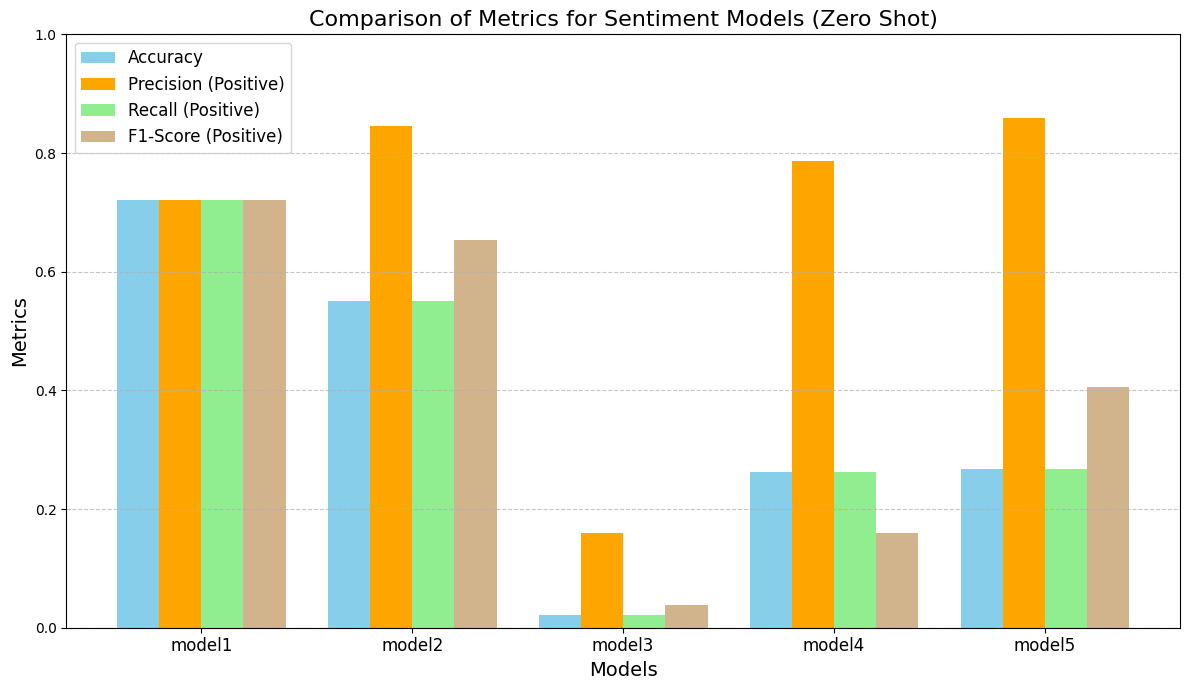

In [79]:
import matplotlib.pyplot as plt
import numpy as np

# Define the data for the models
models = ["model1", "model2", "model3", "model4", "model5"]
accuracy = [0.720000, 0.551111, 0.022222, 0.262222, 0.266667]
precision_pos = [0.721042, 0.845748, 0.160000, 0.786057, 0.859711]
recall_pos = [0.720000, 0.551111, 0.022222, 0.262222, 0.266667]
f1_pos = [0.720507, 0.653048, 0.039024, 0.159115, 0.404953]

# Define the x positions for the bars
x = np.arange(len(models))

# Define the width of the bars
width = 0.2

# Create the bar chart
plt.figure(figsize=(12, 7))
plt.bar(x - 1.5 * width, accuracy, width, label="Accuracy", color="skyblue")
plt.bar(x - 0.5 * width, precision_pos, width, label="Precision (Positive)", color="orange")
plt.bar(x + 0.5 * width, recall_pos, width, label="Recall (Positive)", color="lightgreen")
plt.bar(x + 1.5 * width, f1_pos, width, label="F1-Score (Positive)", color="tan")

# Add labels and title
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.title("Comparison of Metrics for Sentiment Models (Zero Shot)", fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0, 1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

## Fine-Tuning for Few-shot Sentiment Analysis

In [32]:
!pip install transformers[torch]
!pip install accelerate>=0.26.0
!pip install -q scikit-learn
!pip install datasets

In [33]:
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification, Trainer, TrainingArguments
from datasets import Dataset

In [90]:
def preprocess_dataset(df, model_name="savasy/bert-base-turkish-sentiment-cased"):
    """
    Preprocess the labeled dataset by tokenizing sentences and converting labels to integers.

    Args:
        df (pandas.DataFrame): DataFrame containing 'Tagged_Sentence' and 'Sentiment_Label' columns.
        model_name (str): Pretrained model name for tokenization.

    Returns:
        Dataset: Tokenized HuggingFace Dataset with labels included.
    """
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Map sentiment labels to integers
    label_mapping = {"positive": 1, "negative": 0}
    df["label"] = df["label"].map(label_mapping)

    # Encode the dataset
    def preprocess_function(examples):
        tokenized = tokenizer(
            examples["Tagged_Sentence"],
            truncation=True,
            padding="max_length",
            max_length=128
        )
        tokenized["label"] = examples["label"]  # Map the label column
        return tokenized

    # Convert DataFrame to Dataset and preprocess
    dataset = Dataset.from_pandas(df)
    encoded_dataset = dataset.map(preprocess_function, batched=True)

    return encoded_dataset

In [91]:
def split_dataset(encoded_dataset, train_size=15):
    """
    Split the dataset into training and evaluation datasets.

    Args:
        encoded_dataset (Dataset): Tokenized HuggingFace Dataset.
        train_ratio (float): Ratio of data to use for training (default: 0.8).

    Returns:
        train_dataset, eval_dataset: Training and evaluation datasets.
    """
    train_size = train_size
    train_dataset = encoded_dataset.select(range(train_size))
    eval_dataset = encoded_dataset.select(range(train_size, len(encoded_dataset)))

    return train_dataset, eval_dataset

In [92]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import numpy as np

def compute_metrics(pred):
    """
    Compute accuracy, precision, recall, and F1 score for evaluation.

    Args:
        pred: Predictions from the Trainer.

    Returns:
        dict: Evaluation metrics.
    """

    # Ensure predictions and labels are on the CPU
    predictions = np.argmax(pred.predictions, axis=1)
    labels = pred.label_ids

    # Compute metrics
    precision, recall, f1, _ = precision_recall_fscore_support(labels, predictions, average="weighted")
    acc = accuracy_score(labels, predictions)

    return {"accuracy": acc, "f1": f1, "precision": precision, "recall": recall}


In [93]:
# prompt: Read the csv file on "/content/drive/MyDrive/ceng534/data/final_dataset/evaluation_dataset.csv" and hold them as eval_dataset

import pandas as pd

labeled_df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/labeled_dataset.csv')
print("Size of the labeled dataset: ", len(labeled_df))
labeled_df.tail()

Size of the labeled dataset:  225


,Tagged_Sentence,label
220,"2024 spor yılıydı: CAN, Euro, Roland Garros, T...",positive
221,"France 24'in önerdiği gibi, bizi etkilediği, h...",positive
222,"Papa [B-PER:Francis], Çarşamba günü, özellikle...",positive
223,[B-LOC:Afrika] futbolunun liderleri Pazartesi ...,positive
224,[B-LOC:Afrika] futbol sevgileri tarafından kat...,positive


- **WANDB API Key:** af9af3bbdb0984924bedd53b1dc95028b250b9f8


In [94]:
def train_sentiment_model(train_dataset, eval_dataset, model_name, num_labels):
    """
    Train a sentiment analysis model with the training dataset.

    Args:
        train_dataset (Dataset): Tokenized training dataset.
        eval_dataset (Dataset): Tokenized evaluation dataset.
        model_name (str): Pretrained model name.

    Returns:
        Trainer: Trained sentiment analysis model trainer.
        AutoModelForSequenceClassification: Trained sentiment analysis model.
    """
    # Load pretrained model
    model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

    # Define the training arguments
    training_args = TrainingArguments(
        output_dir="./results",
        evaluation_strategy="epoch",
        learning_rate=2e-5,
        per_device_train_batch_size=2,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        logging_dir="./logs",
        logging_steps=10,
        save_strategy="epoch",
        load_best_model_at_end=True
    )

    # Initialize Trainer
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=eval_dataset,
        compute_metrics=compute_metrics
    )

    # Train the model
    trainer.train()

    return trainer, model

#### Notes
- Since the train_loss is decreasing as *epoch* count increases because of overfitting, we set the *epoch* **3**.


In [95]:
import pandas as pd

def train_model(model_name, output_model_path, num_labels):

    # Step 1: Preprocess the dataset
    model_name = model_name

    # manually labeled data ile değiştirilecek!
    labeled_df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/labeled_dataset.csv')[["Tagged_Sentence", "label"]]

    encoded_dataset = preprocess_dataset(labeled_df, model_name)

    # Step 2: Split the dataset
    train_dataset, eval_dataset = split_dataset(encoded_dataset)

    print(f"The model {model_name} training!")

    # Step 3: Train the model
    trainer, trained_model = train_sentiment_model(train_dataset, eval_dataset, model_name, num_labels)

    # Save the trained model
    trained_model.save_pretrained(output_model_path)
    print("Trained model saved")

In [7]:
# Turkish Sentiment Analysis models
model1 = "savasy/bert-base-turkish-sentiment-cased"
model2 = "Gorengoz/bert-turkish-sentiment-analysis-cased"
model3 = "saribasmetehan/bert-base-turkish-sentiment-analysis"
model4 = "emre/turkish-sentiment-analysis"
model5 = "akoksal/bounti"

In [97]:
# Call train_model for each model

model_names = [model1, model2, model3, model4, model5]
output_paths = [
    "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1",
    "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model2",
    "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model3",
    "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model4",
    "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model5"
]
num_labels = [2, 3, 3, 3, 3]

for model_name, output_path, num_label in zip(model_names, output_paths, num_labels):
    train_model(model_name, output_path, num_label)

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset({
    features: ['Tagged_Sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.201882,0.714286,0.663492,0.699671,0.714286
2,0.921800,1.096695,0.761905,0.741074,0.754707,0.761905
3,0.051900,1.089904,0.761905,0.745147,0.752674,0.761905


Trained model saved


Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset({
    features: ['Tagged_Sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})


/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.958128,0.580952,0.518646,0.486312,0.580952
2,1.440600,0.960663,0.604762,0.538166,0.511078,0.604762
3,0.851500,0.962533,0.604762,0.538166,0.511078,0.604762


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Trained model saved


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/755k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset({
    features: ['Tagged_Sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})


config.json:   0%|          | 0.00/858 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,2.232398,0.680952,0.575695,0.626844,0.680952
2,2.320800,1.800503,0.704762,0.638861,0.689813,0.704762
3,0.613500,1.648520,0.700000,0.656421,0.672449,0.700000


Trained model saved


tokenizer_config.json:   0%|          | 0.00/352 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.28M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset({
    features: ['Tagged_Sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})


config.json:   0%|          | 0.00/904 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/737M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,3.312341,0.185714,0.281138,0.724482,0.185714
2,3.441000,2.670321,0.385714,0.466674,0.610188,0.385714
3,0.534400,2.555081,0.447619,0.512421,0.607953,0.447619


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'max_length': 64}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true sa

Trained model saved


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Map:   0%|          | 0/225 [00:00<?, ? examples/s]

Dataset({
    features: ['Tagged_Sentence', 'label', 'input_ids', 'token_type_ids', 'attention_mask'],
    num_rows: 15
})


pytorch_model.bin:   0%|          | 0.00/737M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,1.098281,0.671429,0.583218,0.604032,0.671429
2,0.944200,1.006207,0.685714,0.617824,0.665395,0.685714
3,0.502200,0.899763,0.742857,0.713030,0.766580,0.742857


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Trained model saved


In [98]:
# prompt: Can you write a code to use the model saved into the folder "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1" to make few-shot sentiment analysis. The dataset is located in /content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv. The code will make sentiment analysis to the Tagged_Sentence column

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1"

model1 =  "savasy/bert-base-turkish-sentiment-cased"
tokenizer = AutoTokenizer.from_pretrained(model1)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head()[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


,Tagged_Sentence,Sentiment_Label,Sentiment_Score
0,İki gün önce 92 yaşında bir savaşçı öldü ve şi...,negative,0.998909
1,"Birçok kişi onunla bağlantılıdır, özellikle de...",positive,0.999166
2,Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le ...,positive,0.997928
3,[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'n...,negative,0.999472
4,[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [...,negative,0.997133


In [2]:
!pip install datasets
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 30.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 13.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 20.1 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2024.10.0
    Uninstalling fsspec-2024.10.0:
      Successfully uninstalled fsspec-2024.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 9.2 MB/s eta 0:00:00


In [5]:
import pandas as pd
dataset = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/labeled_dataset.csv')

In [10]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import evaluate

# Assume `dataset` is a pandas DataFrame with 'Tagged_Sentence' and 'label' columns
dataset_hf = Dataset.from_pandas(dataset)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=42)

# Map string labels to integers
label_mapping = {'negative': 0, 'positive': 1}
def map_labels(example):
    if example['label'] not in label_mapping:
        raise ValueError(f"Unexpected label: {example['label']}")
    example['label'] = label_mapping[example['label']]
    return example

dataset_hf = dataset_hf.map(map_labels)

# Validate unique labels in the dataset
print("Unique labels in the dataset:", set(dataset_hf["train"]["label"]))

# Set the number of labels dynamically
num_labels = len(set(dataset_hf["train"]["label"]))

# Set the model name
model_name = model1

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Tagged_Sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(180))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(45))

print("Train labels:", set(dataset_hf["train"]["label"]))
print("Eval labels:", set(dataset_hf["test"]["label"]))

# Load evaluation metrics

def compute_metrics(eval_pred):
  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load("precision")
  recall_metric = evaluate.load("recall")
  f1_metric = evaluate.load("f1")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
  precision_per_class = precision_metric.compute(predictions=predictions, references=labels, average=None)
  recall_per_class = recall_metric.compute(predictions=predictions, references=labels, average=None)
  f1_per_class = f1_metric.compute(predictions=predictions, references=labels, average=None)

  return {
      "accuracy": accuracy,
      "precision": precision_per_class["precision"][0],
      "recall": recall_per_class["recall"][0],
      "f1": f1_per_class["f1"][0]
  }

# Load the pretrained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

from torch import nn

model.classifier = nn.Linear(model.config.hidden_size, num_labels)

training_args_3_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_5_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_10_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_15_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_0 = Trainer(
    model=model.to("cuda"),
    args=training_args_3_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_1 = Trainer(
    model=model.to("cuda"),
    args=training_args_5_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_early_stopper = Trainer(
    model=model.to("cuda"),
    args=training_args_15_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train the model
trainer_0.train()
trainer_1.train()
trainer_early_stopper.train()

# Evaluate the model
eval_results_0 = trainer_0.evaluate()
eval_results_1 = trainer_1.evaluate()
eval_results_early_stopper = trainer_early_stopper.evaluate()

print("Evaluation Results:", eval_results_0)
print("Evaluation Results:", eval_results_1)
print("Evaluation Results:", eval_results_early_stopper)

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Unique labels in the dataset: {0, 1}


Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Train labels: {0, 1}
Eval labels: {0, 1}


model.safetensors:   0%|          | 0.00/442M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.552000,0.442659,0.777778,0.810811,0.909091,0.857143
2,0.341100,0.384523,0.844444,0.933333,0.848485,0.888889
3,0.237400,0.385081,0.800000,0.928571,0.787879,0.852459


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.126800,0.492186,0.800000,0.928571,0.787879,0.852459
2,0.043900,0.665244,0.822222,0.931034,0.818182,0.870968
3,0.004400,0.732419,0.822222,0.903226,0.848485,0.875000
4,0.002200,0.767242,0.844444,0.906250,0.878788,0.892308
5,0.004100,0.775178,0.844444,0.906250,0.878788,0.892308


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.066300,0.873097,0.800000,0.852941,0.878788,0.865672
2,0.071300,0.693366,0.844444,0.933333,0.848485,0.888889
3,0.001000,0.935050,0.822222,0.962963,0.787879,0.866667
4,0.000500,0.999409,0.822222,0.962963,0.787879,0.866667


Evaluation Results: {'eval_loss': 0.6933655738830566, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 6.831, 'eval_samples_per_second': 6.588, 'eval_steps_per_second': 0.878, 'epoch': 3.0}
Evaluation Results: {'eval_loss': 0.6933655738830566, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 5.1486, 'eval_samples_per_second': 8.74, 'eval_steps_per_second': 1.165, 'epoch': 5.0}
Evaluation Results: {'eval_loss': 0.6933655738830566, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 5.1004, 'eval_samples_per_second': 8.823, 'eval_steps_per_second': 1.176, 'epoch': 4.0}


In [11]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import evaluate

# Assume `dataset` is a pandas DataFrame with 'Tagged_Sentence' and 'label' columns
dataset_hf = Dataset.from_pandas(dataset)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=42)

# Map string labels to integers
label_mapping = {'negative': 0, 'positive': 1}
def map_labels(example):
    if example['label'] not in label_mapping:
        raise ValueError(f"Unexpected label: {example['label']}")
    example['label'] = label_mapping[example['label']]
    return example

dataset_hf = dataset_hf.map(map_labels)

# Validate unique labels in the dataset
print("Unique labels in the dataset:", set(dataset_hf["train"]["label"]))

# Set the number of labels dynamically
num_labels = len(set(dataset_hf["train"]["label"]))

# Set the model name
model_name = model2

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Tagged_Sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(180))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(45))

print("Train labels:", set(dataset_hf["train"]["label"]))
print("Eval labels:", set(dataset_hf["test"]["label"]))

# Load evaluation metrics

def compute_metrics(eval_pred):
  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load("precision")
  recall_metric = evaluate.load("recall")
  f1_metric = evaluate.load("f1")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
  precision_per_class = precision_metric.compute(predictions=predictions, references=labels, average=None)
  recall_per_class = recall_metric.compute(predictions=predictions, references=labels, average=None)
  f1_per_class = f1_metric.compute(predictions=predictions, references=labels, average=None)

  return {
      "accuracy": accuracy,
      "precision": precision_per_class["precision"][0],
      "recall": recall_per_class["recall"][0],
      "f1": f1_per_class["f1"][0]
  }

# Load the pretrained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

from torch import nn

model.classifier = nn.Linear(model.config.hidden_size, num_labels)

training_args_3_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_5_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_10_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_15_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_0 = Trainer(
    model=model.to("cuda"),
    args=training_args_3_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_1 = Trainer(
    model=model.to("cuda"),
    args=training_args_5_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_early_stopper = Trainer(
    model=model.to("cuda"),
    args=training_args_15_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train the model
trainer_0.train()
trainer_1.train()
trainer_early_stopper.train()

# Evaluate the model
eval_results_0 = trainer_0.evaluate()
eval_results_1 = trainer_1.evaluate()
eval_results_early_stopper = trainer_early_stopper.evaluate()

print("Evaluation Results:", eval_results_0)
print("Evaluation Results:", eval_results_1)
print("Evaluation Results:", eval_results_early_stopper)

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Unique labels in the dataset: {0, 1}


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.18M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.24M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Train labels: {0, 1}
Eval labels: {0, 1}


config.json:   0%|          | 0.00/864 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/737M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at Gorengoz/bert-turkish-sentiment-analysis-cased and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.445200,0.369444,0.822222,0.903226,0.848485,0.875000
2,0.314000,0.361108,0.844444,0.964286,0.818182,0.885246
3,0.188100,0.358411,0.822222,0.931034,0.818182,0.870968


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.293300,0.504141,0.844444,0.933333,0.848485,0.888889
2,0.103800,0.639265,0.822222,0.931034,0.818182,0.870968
3,0.092400,0.690654,0.822222,0.931034,0.818182,0.870968
4,0.060000,0.750015,0.822222,0.931034,0.818182,0.870968
5,0.002700,0.804813,0.822222,0.931034,0.818182,0.870968


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.437200,1.122314,0.777778,0.925926,0.757576,0.833333
2,0.085000,0.898384,0.844444,0.933333,0.848485,0.888889
3,0.003000,0.918355,0.844444,0.933333,0.848485,0.888889
4,0.058700,0.986382,0.844444,0.933333,0.848485,0.888889


Evaluation Results: {'eval_loss': 0.8983838558197021, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 5.0427, 'eval_samples_per_second': 8.924, 'eval_steps_per_second': 1.19, 'epoch': 3.0}
Evaluation Results: {'eval_loss': 0.8983838558197021, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 5.0284, 'eval_samples_per_second': 8.949, 'eval_steps_per_second': 1.193, 'epoch': 5.0}
Evaluation Results: {'eval_loss': 0.8983838558197021, 'eval_accuracy': 0.8444444444444444, 'eval_precision': 0.9333333333333333, 'eval_recall': 0.8484848484848485, 'eval_f1': 0.8888888888888888, 'eval_runtime': 5.0932, 'eval_samples_per_second': 8.835, 'eval_steps_per_second': 1.178, 'epoch': 4.0}


In [12]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import evaluate

# Assume `dataset` is a pandas DataFrame with 'Tagged_Sentence' and 'label' columns
dataset_hf = Dataset.from_pandas(dataset)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=42)

# Map string labels to integers
label_mapping = {'negative': 0, 'positive': 1}
def map_labels(example):
    if example['label'] not in label_mapping:
        raise ValueError(f"Unexpected label: {example['label']}")
    example['label'] = label_mapping[example['label']]
    return example

dataset_hf = dataset_hf.map(map_labels)

# Validate unique labels in the dataset
print("Unique labels in the dataset:", set(dataset_hf["train"]["label"]))

# Set the number of labels dynamically
num_labels = len(set(dataset_hf["train"]["label"]))

# Set the model name
model_name = model3

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Tagged_Sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(180))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(45))

print("Train labels:", set(dataset_hf["train"]["label"]))
print("Eval labels:", set(dataset_hf["test"]["label"]))

# Load evaluation metrics

def compute_metrics(eval_pred):
  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load("precision")
  recall_metric = evaluate.load("recall")
  f1_metric = evaluate.load("f1")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
  precision_per_class = precision_metric.compute(predictions=predictions, references=labels, average=None)
  recall_per_class = recall_metric.compute(predictions=predictions, references=labels, average=None)
  f1_per_class = f1_metric.compute(predictions=predictions, references=labels, average=None)

  return {
      "accuracy": accuracy,
      "precision": precision_per_class["precision"][0],
      "recall": recall_per_class["recall"][0],
      "f1": f1_per_class["f1"][0]
  }

# Load the pretrained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

from torch import nn

model.classifier = nn.Linear(model.config.hidden_size, num_labels)

training_args_3_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_5_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_10_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_15_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_0 = Trainer(
    model=model.to("cuda"),
    args=training_args_3_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_1 = Trainer(
    model=model.to("cuda"),
    args=training_args_5_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_early_stopper = Trainer(
    model=model.to("cuda"),
    args=training_args_15_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train the model
trainer_0.train()
trainer_1.train()
trainer_early_stopper.train()

# Evaluate the model
eval_results_0 = trainer_0.evaluate()
eval_results_1 = trainer_1.evaluate()
eval_results_early_stopper = trainer_early_stopper.evaluate()

print("Evaluation Results:", eval_results_0)
print("Evaluation Results:", eval_results_1)
print("Evaluation Results:", eval_results_early_stopper)

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Unique labels in the dataset: {0, 1}


tokenizer_config.json:   0%|          | 0.00/1.25k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/251k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/755k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Train labels: {0, 1}
Eval labels: {0, 1}


config.json:   0%|          | 0.00/858 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/443M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at saribasmetehan/bert-base-turkish-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.570700,0.419939,0.800000,0.785714,1.000000,0.880000
2,0.384800,0.361455,0.844444,0.906250,0.878788,0.892308
3,0.308500,0.374202,0.822222,0.931034,0.818182,0.870968


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.224100,0.484621,0.800000,0.900000,0.818182,0.857143
2,0.117200,0.734552,0.755556,0.958333,0.696970,0.807018
3,0.026300,0.827097,0.822222,0.931034,0.818182,0.870968
4,0.052000,0.940354,0.822222,0.931034,0.818182,0.870968
5,0.006300,0.945758,0.822222,0.931034,0.818182,0.870968


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.273400,0.833847,0.800000,0.928571,0.787879,0.852459
2,0.092500,0.853163,0.822222,0.962963,0.787879,0.866667
3,0.003100,0.957353,0.822222,0.962963,0.787879,0.866667


Evaluation Results: {'eval_loss': 0.8338468670845032, 'eval_accuracy': 0.8, 'eval_precision': 0.9285714285714286, 'eval_recall': 0.7878787878787878, 'eval_f1': 0.8524590163934426, 'eval_runtime': 5.1669, 'eval_samples_per_second': 8.709, 'eval_steps_per_second': 1.161, 'epoch': 3.0}
Evaluation Results: {'eval_loss': 0.8338468670845032, 'eval_accuracy': 0.8, 'eval_precision': 0.9285714285714286, 'eval_recall': 0.7878787878787878, 'eval_f1': 0.8524590163934426, 'eval_runtime': 5.1196, 'eval_samples_per_second': 8.79, 'eval_steps_per_second': 1.172, 'epoch': 5.0}
Evaluation Results: {'eval_loss': 0.8338468670845032, 'eval_accuracy': 0.8, 'eval_precision': 0.9285714285714286, 'eval_recall': 0.7878787878787878, 'eval_f1': 0.8524590163934426, 'eval_runtime': 5.1996, 'eval_samples_per_second': 8.655, 'eval_steps_per_second': 1.154, 'epoch': 3.0}


In [13]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import evaluate

# Assume `dataset` is a pandas DataFrame with 'Tagged_Sentence' and 'label' columns
dataset_hf = Dataset.from_pandas(dataset)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=42)

# Map string labels to integers
label_mapping = {'negative': 0, 'positive': 1}
def map_labels(example):
    if example['label'] not in label_mapping:
        raise ValueError(f"Unexpected label: {example['label']}")
    example['label'] = label_mapping[example['label']]
    return example

dataset_hf = dataset_hf.map(map_labels)

# Validate unique labels in the dataset
print("Unique labels in the dataset:", set(dataset_hf["train"]["label"]))

# Set the number of labels dynamically
num_labels = len(set(dataset_hf["train"]["label"]))

# Set the model name
model_name = model4

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Tagged_Sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(180))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(45))

print("Train labels:", set(dataset_hf["train"]["label"]))
print("Eval labels:", set(dataset_hf["test"]["label"]))

# Load evaluation metrics

def compute_metrics(eval_pred):
  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load("precision")
  recall_metric = evaluate.load("recall")
  f1_metric = evaluate.load("f1")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
  precision_per_class = precision_metric.compute(predictions=predictions, references=labels, average=None)
  recall_per_class = recall_metric.compute(predictions=predictions, references=labels, average=None)
  f1_per_class = f1_metric.compute(predictions=predictions, references=labels, average=None)

  return {
      "accuracy": accuracy,
      "precision": precision_per_class["precision"][0],
      "recall": recall_per_class["recall"][0],
      "f1": f1_per_class["f1"][0]
  }

# Load the pretrained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

from torch import nn

model.classifier = nn.Linear(model.config.hidden_size, num_labels)

training_args_3_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_5_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_10_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_15_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_0 = Trainer(
    model=model.to("cuda"),
    args=training_args_3_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_1 = Trainer(
    model=model.to("cuda"),
    args=training_args_5_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_early_stopper = Trainer(
    model=model.to("cuda"),
    args=training_args_15_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train the model
trainer_0.train()
trainer_1.train()
trainer_early_stopper.train()

# Evaluate the model
eval_results_0 = trainer_0.evaluate()
eval_results_1 = trainer_1.evaluate()
eval_results_early_stopper = trainer_early_stopper.evaluate()

print("Evaluation Results:", eval_results_0)
print("Evaluation Results:", eval_results_1)
print("Evaluation Results:", eval_results_early_stopper)

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Unique labels in the dataset: {0, 1}


Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Train labels: {0, 1}
Eval labels: {0, 1}


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at emre/turkish-sentiment-analysis and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/li

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.634400,0.578347,0.733333,0.733333,1.000000,0.846154
2,0.604500,0.568669,0.733333,0.733333,1.000000,0.846154
3,0.547000,0.556597,0.733333,0.733333,1.000000,0.846154


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'max_length': 64}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.588100,0.604432,0.644444,0.742857,0.787879,0.764706
2,0.501100,0.492559,0.666667,0.800000,0.727273,0.761905
3,0.345300,0.480396,0.755556,0.923077,0.727273,0.813559
4,0.199600,0.515348,0.711111,0.954545,0.636364,0.763636
5,0.170700,0.501230,0.711111,0.954545,0.636364,0.763636


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'max_length': 64}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: 

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.211600,0.649839,0.666667,0.909091,0.606061,0.727273
2,0.206200,0.569569,0.711111,0.857143,0.727273,0.786885
3,0.099600,0.936407,0.644444,0.869565,0.606061,0.714286
4,0.013000,0.787960,0.755556,0.892857,0.757576,0.819672


/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: {'max_length': 64}
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/configuration_utils.py:393: UserWarning: Some non-default generation parameters are set in the model config. These should go into either a) `model.generation_config` (as opposed to `model.config`); OR b) a GenerationConfig file (https://huggingface.co/docs/transformers/generation_strategies#save-a-custom-decoding-strategy-with-your-model).This warning will become an exception in the future.
Non-default generation parameters: 

Evaluation Results: {'eval_loss': 0.56956946849823, 'eval_accuracy': 0.7111111111111111, 'eval_precision': 0.8571428571428571, 'eval_recall': 0.7272727272727273, 'eval_f1': 0.7868852459016393, 'eval_runtime': 5.0956, 'eval_samples_per_second': 8.831, 'eval_steps_per_second': 1.177, 'epoch': 3.0}
Evaluation Results: {'eval_loss': 0.56956946849823, 'eval_accuracy': 0.7111111111111111, 'eval_precision': 0.8571428571428571, 'eval_recall': 0.7272727272727273, 'eval_f1': 0.7868852459016393, 'eval_runtime': 5.0506, 'eval_samples_per_second': 8.91, 'eval_steps_per_second': 1.188, 'epoch': 5.0}
Evaluation Results: {'eval_loss': 0.56956946849823, 'eval_accuracy': 0.7111111111111111, 'eval_precision': 0.8571428571428571, 'eval_recall': 0.7272727272727273, 'eval_f1': 0.7868852459016393, 'eval_runtime': 4.9745, 'eval_samples_per_second': 9.046, 'eval_steps_per_second': 1.206, 'epoch': 4.0}


In [14]:
from datasets import Dataset
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer, EarlyStoppingCallback
import numpy as np
import evaluate

# Assume `dataset` is a pandas DataFrame with 'Tagged_Sentence' and 'label' columns
dataset_hf = Dataset.from_pandas(dataset)
dataset_hf = dataset_hf.train_test_split(test_size=0.2, seed=42)

# Map string labels to integers
label_mapping = {'negative': 0, 'positive': 1}
def map_labels(example):
    if example['label'] not in label_mapping:
        raise ValueError(f"Unexpected label: {example['label']}")
    example['label'] = label_mapping[example['label']]
    return example

dataset_hf = dataset_hf.map(map_labels)

# Validate unique labels in the dataset
print("Unique labels in the dataset:", set(dataset_hf["train"]["label"]))

# Set the number of labels dynamically
num_labels = len(set(dataset_hf["train"]["label"]))

# Set the model name
model_name = model5

# Tokenize the dataset
tokenizer = AutoTokenizer.from_pretrained(model_name)
def tokenize_function(examples):
    return tokenizer(examples["Tagged_Sentence"], padding="max_length", truncation=True, max_length=128)
tokenized_datasets = dataset_hf.map(tokenize_function, batched=True)

small_train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(180))
small_eval_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(45))

print("Train labels:", set(dataset_hf["train"]["label"]))
print("Eval labels:", set(dataset_hf["test"]["label"]))

# Load evaluation metrics

def compute_metrics(eval_pred):
  accuracy_metric = evaluate.load("accuracy")
  precision_metric = evaluate.load("precision")
  recall_metric = evaluate.load("recall")
  f1_metric = evaluate.load("f1")
  logits, labels = eval_pred
  predictions = np.argmax(logits, axis=-1)

  accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
  precision_per_class = precision_metric.compute(predictions=predictions, references=labels, average=None)
  recall_per_class = recall_metric.compute(predictions=predictions, references=labels, average=None)
  f1_per_class = f1_metric.compute(predictions=predictions, references=labels, average=None)

  return {
      "accuracy": accuracy,
      "precision": precision_per_class["precision"][0],
      "recall": recall_per_class["recall"][0],
      "f1": f1_per_class["f1"][0]
  }

# Load the pretrained model with the correct number of labels
model = AutoModelForSequenceClassification.from_pretrained(model_name, num_labels=num_labels, ignore_mismatched_sizes=True)

from torch import nn

model.classifier = nn.Linear(model.config.hidden_size, num_labels)

training_args_3_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_5_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=5,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_10_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=10,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

training_args_15_epoch = TrainingArguments(
    output_dir="test_trainer",
    evaluation_strategy="epoch",
    logging_dir="./logs",
    logging_steps=10,
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=15,
    weight_decay=0.1,
    save_strategy="epoch",
    load_best_model_at_end=True,
)

trainer_0 = Trainer(
    model=model.to("cuda"),
    args=training_args_3_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_1 = Trainer(
    model=model.to("cuda"),
    args=training_args_5_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
)

trainer_early_stopper = Trainer(
    model=model.to("cuda"),
    args=training_args_15_epoch,
    train_dataset=small_train_dataset,
    eval_dataset=small_eval_dataset,
    compute_metrics=compute_metrics,
    callbacks=[EarlyStoppingCallback(early_stopping_patience=2)],
)

# Train the model
trainer_0.train()
trainer_1.train()
trainer_early_stopper.train()

# Evaluate the model
eval_results_0 = trainer_0.evaluate()
eval_results_1 = trainer_1.evaluate()
eval_results_early_stopper = trainer_early_stopper.evaluate()

print("Evaluation Results:", eval_results_0)
print("Evaluation Results:", eval_results_1)
print("Evaluation Results:", eval_results_early_stopper)

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Unique labels in the dataset: {0, 1}


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/802 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.23M [00:00<?, ?B/s]

Map:   0%|          | 0/180 [00:00<?, ? examples/s]

Map:   0%|          | 0/45 [00:00<?, ? examples/s]

Train labels: {0, 1}
Eval labels: {0, 1}


pytorch_model.bin:   0%|          | 0.00/737M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at akoksal/bounti and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1575: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(
/usr/local/lib/python3.10/dist

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.557700,0.338534,0.955556,0.969697,0.969697,0.969697
2,0.270700,0.300461,0.911111,0.967742,0.909091,0.937500
3,0.235300,0.361348,0.822222,0.962963,0.787879,0.866667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.230800,0.350206,0.866667,0.965517,0.848485,0.903226
2,0.032900,0.424032,0.866667,0.935484,0.878788,0.906250
3,0.048100,0.671542,0.800000,0.928571,0.787879,0.852459
4,0.004400,0.699180,0.800000,0.961538,0.757576,0.847458
5,0.002700,0.651910,0.822222,0.962963,0.787879,0.866667


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.210200,0.298023,0.911111,0.967742,0.909091,0.937500
2,0.077500,0.603737,0.844444,0.842105,0.969697,0.901408
3,0.020600,0.818354,0.822222,0.962963,0.787879,0.866667


Evaluation Results: {'eval_loss': 0.2980234920978546, 'eval_accuracy': 0.9111111111111111, 'eval_precision': 0.967741935483871, 'eval_recall': 0.9090909090909091, 'eval_f1': 0.9375, 'eval_runtime': 5.0429, 'eval_samples_per_second': 8.923, 'eval_steps_per_second': 1.19, 'epoch': 3.0}
Evaluation Results: {'eval_loss': 0.2980234920978546, 'eval_accuracy': 0.9111111111111111, 'eval_precision': 0.967741935483871, 'eval_recall': 0.9090909090909091, 'eval_f1': 0.9375, 'eval_runtime': 4.9906, 'eval_samples_per_second': 9.017, 'eval_steps_per_second': 1.202, 'epoch': 5.0}
Evaluation Results: {'eval_loss': 0.2980234920978546, 'eval_accuracy': 0.9111111111111111, 'eval_precision': 0.967741935483871, 'eval_recall': 0.9090909090909091, 'eval_f1': 0.9375, 'eval_runtime': 5.5468, 'eval_samples_per_second': 8.113, 'eval_steps_per_second': 1.082, 'epoch': 3.0}


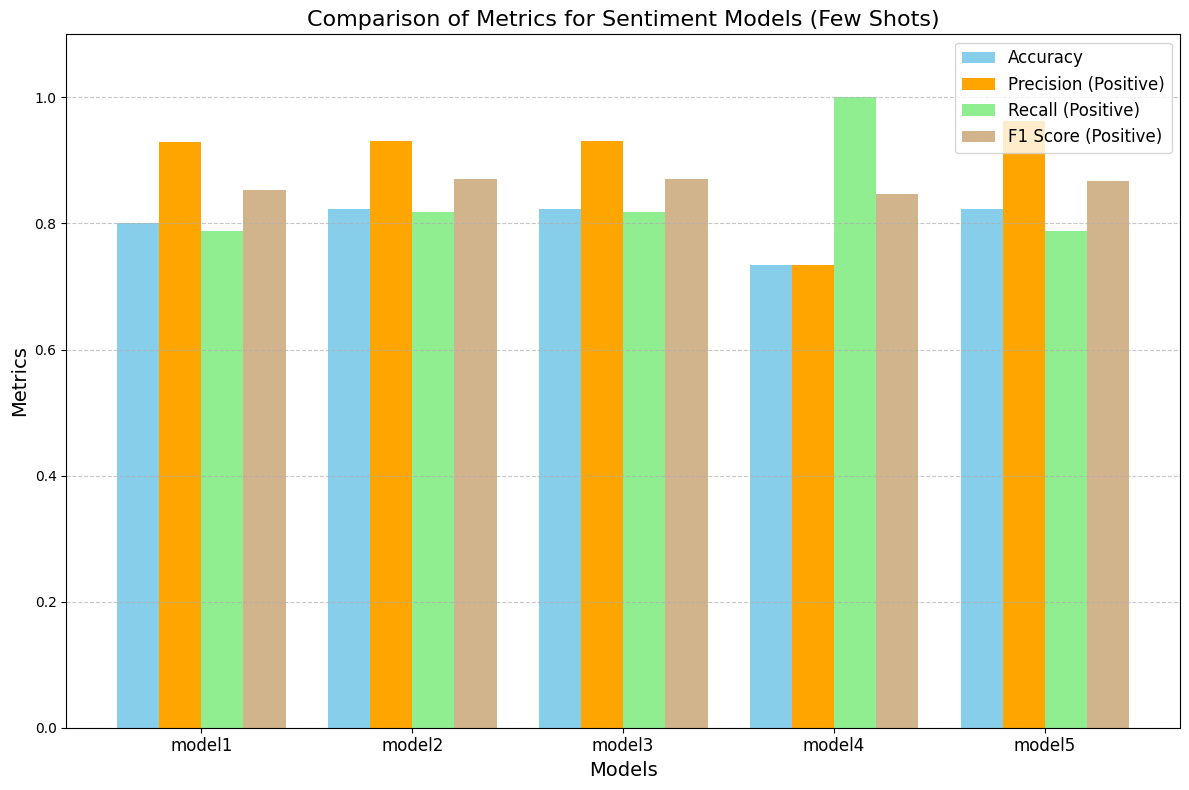

In [38]:
import matplotlib.pyplot as plt
import numpy as np

# Few-shot performance metrics for the models
models = ["model1", "model2", "model3", "model4", "model5"]

accuracy = [0.800000, 0.822222, 0.822222, 0.733333, 0.822222]
precision = [0.928571, 0.931034, 0.931034, 0.733333, 0.962963]
recall = [0.787879, 0.818182, 0.818182, 1.000000, 0.787879]
f1_score = [0.852459, 0.870968, 0.870968, 0.846154, 0.866667]

# Create a bar chart for all metrics
x = np.arange(len(models))  # Position of bars on x-axis
width = 0.2  # Width of each bar

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(x - 1.5 * width, accuracy, width, label='Accuracy', color='skyblue')
plt.bar(x - 0.5 * width, precision, width, label='Precision (Positive)', color='orange')
plt.bar(x + 0.5 * width, recall, width, label='Recall (Positive)', color='lightgreen')
plt.bar(x + 1.5 * width, f1_score, width, label='F1 Score (Positive)', color='tan')

# Adding labels and titles
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.title("Comparison of Metrics for Sentiment Models (Few Shots)", fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()

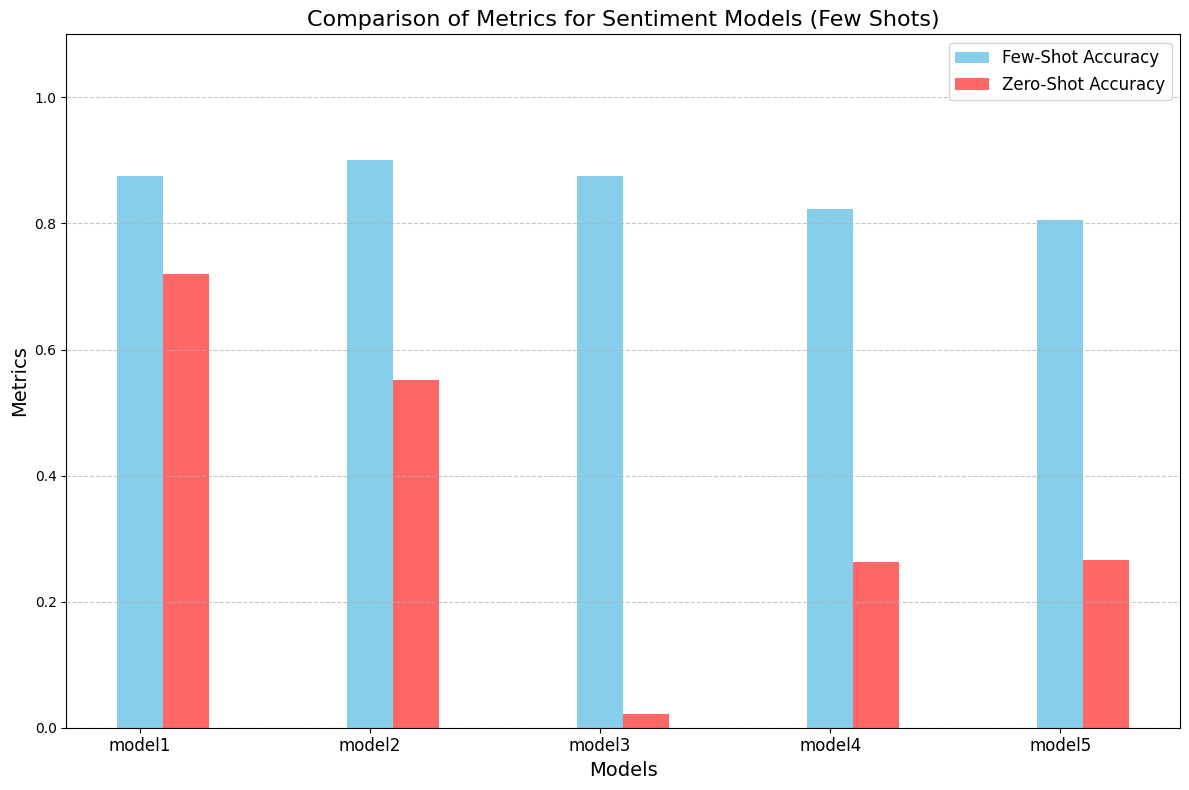

In [51]:
import matplotlib.pyplot as plt
import numpy as np

# Few-shot performance metrics for the models
models = ["model1", "model2", "model3", "model4", "model5"]

accuracy_zero_shot = [0.7200000, 0.551111, 0.022222, 0.262222, 0.266667]
accuracy_few_shot = [0.875000, 0.900000, 0.875000, 0.822222, 0.804878]

# Create a bar chart for all metrics
x = np.arange(len(models))  # Position of bars on x-axis
width = 0.2  # Width of each bar

# Plotting the bars
plt.figure(figsize=(12, 8))
plt.bar(x, accuracy_few_shot, width, label='Few-Shot Accuracy', color='skyblue')  # Larger bar on the bottom
plt.bar(x+width, accuracy_zero_shot, width, label='Zero-Shot Accuracy', color='red', alpha=0.6)  # Smaller bar on top with transparency

# Adding labels and titles
plt.xlabel("Models", fontsize=14)
plt.ylabel("Metrics", fontsize=14)
plt.title("Comparison of Metrics for Sentiment Models (Few Shots)", fontsize=16)
plt.xticks(x, models, fontsize=12)
plt.ylim(0, 1.1)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)
plt.tight_layout()

# Show the chart
plt.show()


# Few-Shot

In [65]:
# Models
model1 = "savasy/bert-base-turkish-sentiment-cased"
model2 = "Gorengoz/bert-turkish-sentiment-analysis-cased"
model3 = "saribasmetehan/bert-base-turkish-sentiment-analysis"
model4 = "emre/turkish-sentiment-analysis"
model5 = "akoksal/bounti"

## Model1

In [61]:
from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd
pd.set_option("display.max_colwidth", None)

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1"

tokenizer = AutoTokenizer.from_pretrained(model1)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head(25)[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


,Tagged_Sentence,Sentiment_Label,Sentiment_Score
0,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.,negative,0.998909
1,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",positive,0.999166
2,"Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.",positive,0.997928
3,"[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur.",negative,0.999472
4,"[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.",negative,0.997133
5,Kutsal Üç Kraliçe kıyafetleri olarak genç [B-PER:Sternsinger] hemen yeniden yardım projelerine harcamalar toplar:,positive,0.999519
6,[B-LOC:Paderborner] [I-LOC:Dom]'da [B-LOC:Dreikönigssingen] Aksiyonu açılacak.,positive,0.992438
7,"Noel günleri boyunca, [B-LOC:Ostsee]'de bir Unterseekabel'in yeniden hasar görmüş olması.",negative,0.999481
8,"[B-LOC:Finlandiya], sabotaj yapmayı ve bir gemiyi bağlamayı değiştirdi.",negative,0.999693
9,"Dışişleri Bakanı [B-PER:Baerbock], daha fazla olayın gerçekleşeceğini ve ""sıkı bir Weckruf"" olacağını söyledi.",negative,0.999289


## Model2

In [60]:
# prompt: Can you write a code to use the model saved into the folder "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1" to make few-shot sentiment analysis. The dataset is located in /content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv. The code will make sentiment analysis to the Tagged_Sentence column

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model2"

tokenizer = AutoTokenizer.from_pretrained(model2)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head(25)[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


## Model3

In [62]:
# prompt: Can you write a code to use the model saved into the folder "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1" to make few-shot sentiment analysis. The dataset is located in /content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv. The code will make sentiment analysis to the Tagged_Sentence column

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model2"

tokenizer = AutoTokenizer.from_pretrained(model3)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head(25)[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


,Tagged_Sentence,Sentiment_Label,Sentiment_Score
0,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.,LABEL_0,0.860906
1,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",LABEL_0,0.859957
2,"Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.",LABEL_0,0.852770
3,"[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur.",LABEL_0,0.858005
4,"[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.",LABEL_0,0.949391
5,Kutsal Üç Kraliçe kıyafetleri olarak genç [B-PER:Sternsinger] hemen yeniden yardım projelerine harcamalar toplar:,LABEL_0,0.824026
6,[B-LOC:Paderborner] [I-LOC:Dom]'da [B-LOC:Dreikönigssingen] Aksiyonu açılacak.,LABEL_0,0.831666
7,"Noel günleri boyunca, [B-LOC:Ostsee]'de bir Unterseekabel'in yeniden hasar görmüş olması.",LABEL_0,0.861502
8,"[B-LOC:Finlandiya], sabotaj yapmayı ve bir gemiyi bağlamayı değiştirdi.",LABEL_0,0.564838
9,"Dışişleri Bakanı [B-PER:Baerbock], daha fazla olayın gerçekleşeceğini ve ""sıkı bir Weckruf"" olacağını söyledi.",LABEL_0,0.648183


## Model4

In [63]:
# prompt: Can you write a code to use the model saved into the folder "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1" to make few-shot sentiment analysis. The dataset is located in /content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv. The code will make sentiment analysis to the Tagged_Sentence column

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model2"

tokenizer = AutoTokenizer.from_pretrained(model4)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head(25)[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


,Tagged_Sentence,Sentiment_Label,Sentiment_Score
0,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.,LABEL_0,0.943141
1,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",LABEL_2,0.510696
2,"Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.",LABEL_0,0.903642
3,"[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur.",LABEL_0,0.865464
4,"[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.",LABEL_0,0.934402
5,Kutsal Üç Kraliçe kıyafetleri olarak genç [B-PER:Sternsinger] hemen yeniden yardım projelerine harcamalar toplar:,LABEL_0,0.896756
6,[B-LOC:Paderborner] [I-LOC:Dom]'da [B-LOC:Dreikönigssingen] Aksiyonu açılacak.,LABEL_0,0.953655
7,"Noel günleri boyunca, [B-LOC:Ostsee]'de bir Unterseekabel'in yeniden hasar görmüş olması.",LABEL_0,0.876773
8,"[B-LOC:Finlandiya], sabotaj yapmayı ve bir gemiyi bağlamayı değiştirdi.",LABEL_0,0.915274
9,"Dışişleri Bakanı [B-PER:Baerbock], daha fazla olayın gerçekleşeceğini ve ""sıkı bir Weckruf"" olacağını söyledi.",LABEL_0,0.892783


## Model 5

In [64]:
# prompt: Can you write a code to use the model saved into the folder "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model1" to make few-shot sentiment analysis. The dataset is located in /content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv. The code will make sentiment analysis to the Tagged_Sentence column

from transformers import pipeline, AutoTokenizer, AutoModelForSequenceClassification
import pandas as pd

# Load the saved model and tokenizer
model_path = "/content/drive/MyDrive/ceng534/trained_models/trained_sentiment_model2"

tokenizer = AutoTokenizer.from_pretrained(model2)
model = AutoModelForSequenceClassification.from_pretrained(model_path)

# Create the sentiment analysis pipeline
sentiment_pipeline = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/ceng534/data/final_dataset/final_dataset_with_ner.csv')

# Perform sentiment analysis on the 'Tagged_Sentence' column
results = []
for sentence in df['Tagged_Sentence']:
    try:
        result = sentiment_pipeline(sentence, truncation=True, max_length=512)[0]
        results.append(result)
    except Exception as e:
        print(f"Error processing sentence: {sentence}. Error: {e}")
        results.append({'label': 'unknown', 'score': 0.0})

# Add the results to the DataFrame
df['Sentiment_Label'] = [result['label'] for result in results]
df['Sentiment_Score'] = [result['score'] for result in results]

# Display or save the results
display(df.head(25)[['Tagged_Sentence', 'Sentiment_Label', 'Sentiment_Score']])
# df.to_csv("sentiment_analysis_results.csv", index=False)

Device set to use cuda:0


,Tagged_Sentence,Sentiment_Label,Sentiment_Score
0,İki gün önce 92 yaşında bir savaşçı öldü ve şimdi [B-LOC:Hindistan]'ın eski başbakanı [B-PER:Singh] eingeäschert edildi.,LABEL_0,0.885129
1,"Birçok kişi onunla bağlantılıdır, özellikle de ekonomik reformları ve Kızılderililerin Yükselmesi.",LABEL_0,0.878929
2,"Büyük Şanslılar ve [B-PER:Gläubigerbanken]'le birlikte [B-PER:BayWa], şimdi, istedikleri iyileşme yönündeki önemli adımlar üzerinde karar verdi.",LABEL_0,0.866314
3,"[B-ORG:Alman] [I-ORG:Hava] [I-ORG:Bakanlığı]'na göre, daha kötü hava kalitesi için çalışan [B-PER:Feinstaub]'un bir araya gelmesi bu durumun sonucudur.",LABEL_0,0.911865
4,"[B-LOC:Ukrayna] Başkanı [B-PER:Selensky]'nin [B-LOC:Slovakya]'nın [B-LOC:Ukrayna]'ya karşı ""iki enerji cephesi"" açması için yaptığı bir girişimde bulunması bekleniyor.",LABEL_0,0.873735
5,Kutsal Üç Kraliçe kıyafetleri olarak genç [B-PER:Sternsinger] hemen yeniden yardım projelerine harcamalar toplar:,LABEL_0,0.631235
6,[B-LOC:Paderborner] [I-LOC:Dom]'da [B-LOC:Dreikönigssingen] Aksiyonu açılacak.,LABEL_0,0.773827
7,"Noel günleri boyunca, [B-LOC:Ostsee]'de bir Unterseekabel'in yeniden hasar görmüş olması.",LABEL_0,0.889409
8,"[B-LOC:Finlandiya], sabotaj yapmayı ve bir gemiyi bağlamayı değiştirdi.",LABEL_0,0.926194
9,"Dışişleri Bakanı [B-PER:Baerbock], daha fazla olayın gerçekleşeceğini ve ""sıkı bir Weckruf"" olacağını söyledi.",LABEL_0,0.840473
